# Proyecto 03 - Procesamiento del Lenguaje Natural

## Dataset: The Multilingual Amazon Reviews Corpus

**Recuerda descargar el dataset de [aquí](https://github.com/kang205/SASRec). Es un archivo .zip que contiene tres documentos. Más información sobre el dataset [aquí](https://registry.opendata.aws/amazon-reviews-ml/). Es importante que tengas en cuenta la [licencia](https://docs.opendata.aws/amazon-reviews-ml/license.txt) de este dataset.**

### Exploración de datos y Procesamiento del Lenguaje Natural

Dedícale un buen tiempo a hacer un Análisis Exploratorio de Datos. Considera que hasta que no hayas aplicado las herramientas de Procesamiento del Lenguaje Natural vistas, será difícil completar este análisis. Elige preguntas que creas que puedas responder con este dataset. Por ejemplo, ¿qué palabras están asociadas a calificaciones positivas y qué palabras a calificaciones negativas?

### Machine Learning

Implementa un modelo que, dada la crítica de un producto, asigne la cantidad de estrellas correspondiente. **Para pensar**: ¿es un problema de Clasificación o de Regresión?

1. Haz todas las transformaciones de datos que consideres necesarias. Justifica.
1. Evalúa de forma apropiada sus resultados. Justifica la métrica elegida.
1. Elige un modelo benchmark y compara tus resultados con este modelo.
1. Optimiza los hiperparámetros de tu modelo.
1. Intenta responder la pregunta: ¿Qué información está usando el modelo para predecir?

**Recomendación:** si no te resulta conveniente trabajar en español con NLTK, te recomendamos que explores la librería [spaCy](https://spacy.io/).

### Para pensar, investigar y, opcionalmente, implementar
1. ¿Valdrá la pena convertir el problema de Machine Learning en un problema binario? Es decir, asignar únicamente las etiquetas Positiva y Negativa a cada crítica y hacer un modelo que, en lugar de predecir las estrellas, prediga esa etiqueta. Pensar en qué situación puede ser útil. ¿Esperas que el desempeño sea mejor o peor?
1. ¿Hay algo que te gustaría investigar o probar?

### **¡Tómate tiempo para investigar y leer mucho!**

Para ver los avances entre el TP3 y TP4, pueden entrar a este [link](https://github.com/frangarayl/NLP-amazon.git) que los llevara al repositorio de GitHub donde se encuentra.

# **Tabla de contenidos**
>1. Exploración de datos
>2. Visualización de datos
>3. Normalización de texto
>4. Preparación de datos para modelos de aprendizaje
>5. Modelos de prediccón
>6. Conclusiones
>7. Continuación de NLP con nuevas librerías

## **1. Exploración de datos**

### Importamos las librerias

In [206]:
# Librerías de toda la vida
import itertools
from tqdm import tqdm
from collections import defaultdict
from collections import Counter

import numpy as np
import pandas as pd
import matplotlib
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('whitegrid')
sns.set_context("notebook", font_scale = 1, rc = {"lines.linewidth": 2.5})

# Tokenización
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import wordnet
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.util import ngrams
from string import punctuation
import re
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# Nuevas librerías
from textblob import TextBlob
from sentiment_analysis_spanish import sentiment_analysis
import emoji
from emot.emo_unicode import UNICODE_EMO, EMOTICONS
import spacy
from spacy import displacy
activated = spacy.prefer_gpu()

nlp = spacy.load("es_core_news_sm")

#!pip install spacy_spanish_lemmatizer
#!python -m spacy_spanish_lemmatizer download wiki

from spacy_spanish_lemmatizer import SpacyCustomLemmatizer
# Change "es" to the Spanish model installed in step 2
lemmatizer = SpacyCustomLemmatizer()
nlp.add_pipe(lemmatizer, name="lemmatizer", after="tagger")

nltk.download('wordnet')
nltk.download('punkt')
nltk.download('stopwords')

from wordcloud import WordCloud

import warnings
warnings.filterwarnings('ignore')

# Machine Learning
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.model_selection import train_test_split

[nltk_data] Downloading package wordnet to C:\Users\Fran
[nltk_data]     Garay\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\Fran
[nltk_data]     Garay\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Fran
[nltk_data]     Garay\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Carga de datos

In [2]:
dev = pd.read_json(r'C:\Users\Fran Garay\Desktop\Acámica - Data Science\BLOQUE 3\NLP 3\dataset_es_dev.json', lines=True)
test = pd.read_json(r'C:\Users\Fran Garay\Desktop\Acámica - Data Science\BLOQUE 3\NLP 3\dataset_es_test.json', lines=True)
train = pd.read_json(r'C:\Users\Fran Garay\Desktop\Acámica - Data Science\BLOQUE 3\NLP 3\dataset_es_train.json', lines=True)

### **Inspección de datos**
Vemos como están conformados los datos, qué información contienen y cómo podemos interpretarlos.

In [3]:
dev.head()

,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category
0,es_0417480,product_es_0873923,reviewer_es_0672978,1,"Malisimo, muy grande demasiado aparatoso y mal...",Mala compra,es,wireless
1,es_0180432,product_es_0713146,reviewer_es_0100858,1,No he recibido el pedido no la devolución,No lo he recibido,es,apparel
2,es_0144850,product_es_0356874,reviewer_es_0486447,1,"Tengo que buscar otro sistema, este no funcion...",Que no aprieta bien en el manillar,es,sports
3,es_0339629,product_es_0939832,reviewer_es_0894703,1,Utilicé las brocas de menor diámetro y se me d...,Brocas de mantequilla,es,home_improvement
4,es_0858362,product_es_0489066,reviewer_es_0887663,1,No me gusta su olor a viejo y aspecto malo,No me gusta,es,beauty


In [4]:
test.head()

,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category
0,es_0038754,product_es_0113523,reviewer_es_0580071,1,no me llego el articulo me lo mando por correo...,no me llego,es,wireless
1,es_0748979,product_es_0017036,reviewer_es_0819733,1,"la mensajería horrible, no compro mas",amazon sigue sin cumplir en las entregas,es,home
2,es_0411746,product_es_0138642,reviewer_es_0508607,1,Estoy muy decepcionado con el vendedor ya que ...,ESTAFA EN EL ENVÍO,es,toy
3,es_0786686,product_es_0170887,reviewer_es_0491157,1,Mi valoración no es sobre el producto sino sob...,Estafa de Amazon,es,home
4,es_0429700,product_es_0710642,reviewer_es_0008745,1,Pues tenía interés en este libro y probé la ve...,No conseguí pasar de la portada en Kindle,es,digital_ebook_purchase


In [5]:
train.head()

,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category
0,es_0491108,product_es_0296024,reviewer_es_0999081,1,Nada bueno se me fue ka pantalla en menos de 8...,television Nevir,es,electronics
1,es_0869872,product_es_0922286,reviewer_es_0216771,1,"Horrible, nos tuvimos que comprar otro porque ...",Dinero tirado a la basura con esta compra,es,electronics
2,es_0811721,product_es_0474543,reviewer_es_0929213,1,Te obligan a comprar dos unidades y te llega s...,solo llega una unidad cuando te obligan a comp...,es,drugstore
3,es_0359921,product_es_0656090,reviewer_es_0224702,1,"No entro en descalificar al vendedor, solo pue...",PRODUCTO NO RECIBIDO.,es,wireless
4,es_0068940,product_es_0662544,reviewer_es_0224827,1,Llega tarde y co la talla equivocada,Devuelto,es,shoes


In [6]:
dev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   review_id         5000 non-null   object
 1   product_id        5000 non-null   object
 2   reviewer_id       5000 non-null   object
 3   stars             5000 non-null   int64 
 4   review_body       5000 non-null   object
 5   review_title      5000 non-null   object
 6   language          5000 non-null   object
 7   product_category  5000 non-null   object
dtypes: int64(1), object(7)
memory usage: 312.6+ KB


In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   review_id         5000 non-null   object
 1   product_id        5000 non-null   object
 2   reviewer_id       5000 non-null   object
 3   stars             5000 non-null   int64 
 4   review_body       5000 non-null   object
 5   review_title      5000 non-null   object
 6   language          5000 non-null   object
 7   product_category  5000 non-null   object
dtypes: int64(1), object(7)
memory usage: 312.6+ KB


In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   review_id         200000 non-null  object
 1   product_id        200000 non-null  object
 2   reviewer_id       200000 non-null  object
 3   stars             200000 non-null  int64 
 4   review_body       200000 non-null  object
 5   review_title      200000 non-null  object
 6   language          200000 non-null  object
 7   product_category  200000 non-null  object
dtypes: int64(1), object(7)
memory usage: 12.2+ MB


In [9]:
train.columns

Index(['review_id', 'product_id', 'reviewer_id', 'stars', 'review_body',
       'review_title', 'language', 'product_category'],
      dtype='object')

### **Sampleo del Train Set**

Primero vamos a tomar una muestra  del 10% del total de la población, ya que en dicha proporción mantenemos el nivel de confianza. Esto lo hacemos con el propósito de acelerar los procesos, y mantenemos la estratificación de la variable respuesta para no perjudicar los resultados.Creamos una funcion que mantenga balanceada la cantidad de estrellas, algo que podriamos hacer tambien con *StratifiedShuffleSplit* o *train_test_split*. Remover outliers mucho no nos sirve para reducir la dimensión del dataset.

In [10]:
N = 30000

strat = train.groupby('stars', group_keys = False).apply(lambda x: x.sample(int(np.rint(N*len(x)/len(train))))).sample(frac=1).reset_index(drop=True)
strat.shape


(30000, 8)

### **Stopwords**

Las stopwords son palabras no tienen un significado por si solas, sino que modifican o acompañan a otras, este grupo suele estar conformado por artículos, pronombres, preposiciones, adverbios e incluso algunos verbos.

En el procesamiento de datos en lenguaje natural son filtradas antes o después del proceso en si, no considerandolos por su nulo significado.

Vamos a usar una lista más completa de stopwords de stopword_json.
https://github.com/6/stopwords-json

También incluimos signos de puntuación.

In [11]:
stopwords_json_es = ["a","actualmente","acuerdo","adelante","ademas","además","adrede","afirmó","agregó","ahi","ahora","ahí","al","algo","alguna","algunas","alguno","algunos","algún",
                           "alli","allí","alrededor","ambos","ampleamos","antano","antaño","ante","anterior","antes","apenas","aproximadamente","aquel","aquella","aquellas","aquello",
                           "aquellos","aqui","aquél","aquélla","aquéllas","aquéllos","aquí","arriba","arribaabajo","aseguró","asi","así","atras","aun","aunque","ayer","añadió","aún",
                           "b","bajo","bastante","bien","breve","buen","buena","buenas","bueno","buenos","c","cada","casi","cerca","cierta","ciertas","cierto","ciertos","cinco","claro",
                           "comentó","como","con","conmigo","conocer","conseguimos","conseguir","considera","consideró","consigo","consigue","consiguen","consigues","contigo","contra",
                           "cosas","creo","cual","cuales","cualquier","cuando","cuanta","cuantas","cuanto","cuantos","cuatro","cuenta","cuál","cuáles","cuándo","cuánta","cuántas","cuánto",
                           "cuántos","cómo","d","da","dado","dan","dar","de","debajo","debe","deben","debido","decir","dejó","del","delante","demasiado","demás","dentro","deprisa","desde",
                           "despacio","despues","después","detras","detrás","dia","dias","dice","dicen","dicho","dieron","diferente","diferentes","dijeron","dijo","dio","donde","dos",
                           "durante","día","días","dónde","e","ejemplo","el","ella","ellas","ello","ellos","embargo","empleais","emplean","emplear","empleas","empleo","en","encima",
                           "encuentra","enfrente","enseguida","entonces","entre","era","eramos","eran","eras","eres","es","esa","esas","ese","eso","esos","esta","estaba","estaban",
                           "estado","estados","estais","estamos","estan","estar","estará","estas","este","esto","estos","estoy","estuvo","está","están","ex","excepto","existe","existen",
                           "explicó","expresó","f","fin","final","fue","fuera","fueron","fui","fuimos","g","general","gran","grandes","gueno","h","ha","haber","habia","habla","hablan",
                           "habrá","había","habían","hace","haceis","hacemos","hacen","hacer","hacerlo","haces","hacia","haciendo","hago","han","hasta","hay","haya","he","hecho","hemos",
                           "hicieron","hizo","horas","hoy","hubo","i","igual","incluso","indicó","informo","informó","intenta","intentais","intentamos","intentan","intentar","intentas",
                           "intento","ir","j","junto","k","l","la","lado","largo","las","le","lejos","les","llegó","lleva","llevar","lo","los","luego","lugar","m","mal","manera",
                           "manifestó","mas","mayor","me","mediante","medio","mejor","mencionó","menos","menudo","mi","mia","mias","mientras","mio","mios","mis","misma","mismas","mismo",
                           "mismos","modo","momento","mucha","muchas","mucho","muchos","muy","más","mí","mía","mías","mío","míos","n","nada","nadie","ni","ninguna","ningunas","ninguno",
                           "ningunos","ningún","no","nos","nosotras","nosotros","nuestra","nuestras","nuestro","nuestros","nueva","nuevas","nuevo","nuevos","nunca","o","ocho","os","otra",
                           "otras","otro","otros","p","pais","para","parece","parte","partir","pasada","pasado","paìs","peor","pero","pesar","poca","pocas","poco","pocos","podeis",
                           "podemos","poder","podria","podriais","podriamos","podrian","podrias","podrá","podrán","podría","podrían","poner","por","porque","posible","primer","primera",
                           "primero","primeros","principalmente","pronto","propia","propias","propio","propios","proximo","próximo","próximos","pudo","pueda","puede","pueden","puedo",
                           "pues","q","qeu","que","quedó","queremos","quien","quienes","quiere","quiza","quizas","quizá","quizás","quién","quiénes","qué","r","raras","realizado",
                           "realizar","realizó","repente","respecto","s","sabe","sabeis","sabemos","saben","saber","sabes","salvo","se","sea","sean","segun","segunda","segundo","según",
                           "seis","ser","sera","será","serán","sería","señaló","si","sido","siempre","siendo","siete","sigue","siguiente","sin","sino","sobre","sois","sola","solamente",
                           "solas","solo","solos","somos","son","soy","soyos","su","supuesto","sus","suya","suyas","suyo","sé","sí","sólo","t","tal","tambien","también","tampoco","tan",
                           "tanto","tarde","te","temprano","tendrá","tendrán","teneis","tenemos","tener","tenga","tengo","tenido","tenía","tercera","ti","tiempo","tiene","tienen","toda",
                           "todas","todavia","todavía","todo","todos","total","trabaja","trabajais","trabajamos","trabajan","trabajar","trabajas","trabajo","tras","trata","través","tres",
                           "tu","tus","tuvo","tuya","tuyas","tuyo","tuyos","tú","u","ultimo","un","una","unas","uno","unos","usa","usais","usamos","usan","usar","usas","uso","usted",
                           "ustedes","v","va","vais","valor","vamos","van","varias","varios","vaya","veces","ver","verdad","verdadera","verdadero","vez","vosotras","vosotros","voy",
                           "vuestra","vuestras","vuestro","vuestros","w","x","y","ya","yo","z","él","ésa","ésas","ése","ésos","ésta","éstas","éste","éstos","última","últimas","último",
                           "últimos"]

stopwords_json_es = set(stopwords_json_es)
stopwords_nltk_es = set(stopwords.words('spanish'))
stopwords_punct = set(punctuation)

# Combine the stopwords.
stopwords = set.union(stopwords_json_es, stopwords_nltk_es)
stoplist_combined = set.union(stopwords_json_es, stopwords_nltk_es, stopwords_punct)

### **Definiendo nuevas variables para analizar el texto**
Vamos a crear una lista con los datasets para agilizar el preprocesamiento a la hora de aplicar funciones. Aplicamos las mismas funciones a todos los datasets para poder luego comparar en la etapa de modelos.

In [12]:
lista_df = [dev, test, strat]

### Largo de texto

In [13]:
def text_length (df):
    df['text_length'] = df['review_body'].apply(len)
    return df

In [14]:
for i in tqdm(lista_df):
    text_length(i)

100%|██████████| 3/3 [00:00<00:00, 200.50it/s]


### Unimos todo el texto en una columna

In [15]:
def full_text (df):
    df['full_text'] = df[['review_title', 'review_body']].apply(' . '.join, axis = 1)
    return df

In [16]:
for i in tqdm(lista_df):
    full_text(i)

100%|██████████| 3/3 [00:00<00:00,  9.16it/s]


### Contador de stopwords

In [17]:
# stop_word_count
def stop_word_count (df):
    df['stop_word_count'] = df['full_text'].apply(lambda x: len([w for w in str(x).lower().split() if w in stopwords]))

In [18]:
for i in tqdm(lista_df):
    stop_word_count(i)

100%|██████████| 3/3 [00:00<00:00,  9.96it/s]


### Número de caracteres

In [19]:
# char_count
def char_count (df):
    df['char_count'] = df['full_text'].apply(lambda x: len(str(x)))

In [20]:
for i in tqdm(lista_df):
    char_count(i)

100%|██████████| 3/3 [00:00<00:00, 143.23it/s]


### Largo promedio de palabras

In [21]:
# mean_word_length
def mean_word_length (df):
    df['mean_word_length'] = df['full_text'].apply(lambda x: np.mean([len(w) for w in str(x).split()]))

In [22]:
for i in tqdm(lista_df):
    mean_word_length(i)

100%|██████████| 3/3 [00:00<00:00,  3.91it/s]


### Signos de exclamación

Asumo que la gente solo pone el signo de exclamación de cierre, y en el caso de que use los dos, debería poder contabilizarse como los que ponen uno solo, porque sino tendrían el doble de elementos contados.

In [23]:
# exclamation_count
def exclamation_count (df):
    df['exclamation_count'] = df['full_text'].apply(lambda x: len([c for c in str(x) if c == '!']))

In [24]:
for i in tqdm(lista_df):
    exclamation_count(i)

100%|██████████| 3/3 [00:00<00:00, 10.97it/s]


### Signos de puntuación

In [25]:
# punctuation_count
def punctuation_count (df):
    df['punctuation_count'] = df['full_text'].apply(lambda x: len([c for c in str(x) if c in stopwords_punct]))

In [26]:
for i in tqdm(lista_df):
    punctuation_count(i)

100%|██████████| 3/3 [00:00<00:00,  9.86it/s]


### Palabras en mayúscula

In [27]:
def uppercase_count (df):
    df['uppercase_count'] = df['full_text'].apply(lambda x: sum(map(str.isupper,x.split())))

In [28]:
for i in tqdm(lista_df):
    uppercase_count(i)

100%|██████████| 3/3 [00:00<00:00, 19.92it/s]


### Identificación de Emojis
Vamos a separar los emojis a otra columna para luego crear variables a partir de ellos. Los separamos debido a que en la normalización se eliminan y consideramos que pueden mejorar el desempeño del modelo.

In [29]:
def emoji_retriever(df):
    df["emojis"] = df["full_text"].apply(lambda x: [c for c in str(x) if c in UNICODE_EMO])

In [30]:
for i in tqdm(lista_df):
    emoji_retriever(i)

100%|██████████| 3/3 [00:00<00:00,  8.24it/s]


### Cantidad de Emojis

In [32]:
def emoji_counter(df):
    df['emojis_count'] = df['full_text'].apply(lambda x: len([c for c in str(x) if c in UNICODE_EMO]))

In [33]:
for i in tqdm(lista_df):
    emoji_counter(i)

100%|██████████| 3/3 [00:00<00:00,  7.77it/s]


### Sentimientos
Probamos con la librería TextBlob pero no le fué posible manejar tanta cantidad de datos, por lo que implementareemos la librería sentiment_analysis_spanish.

**Advertencia:** Puede tardar unos cuantos minutos

In [34]:
sentiment = sentiment_analysis.SentimentAnalysisSpanish()

In [35]:
def sentiment_analysis(df):
    df["sentiment"] = df["full_text"].apply(lambda x: sentiment.sentiment(x))

In [36]:
for i in tqdm(lista_df):
    sentiment_analysis(i)

100%|██████████| 3/3 [22:59<00:00, 459.74s/it]


### **Datos faltantes**
No hay datos faltantes en los datasets

In [37]:
print(f"Numbers of missing label = {strat.isnull().sum()}")
print(f"Numbers of missing msg = {test.isnull().sum()}")
print(f"Numbers of missing msg = {dev.isnull().sum()}")

Numbers of missing label = review_id            0
product_id           0
reviewer_id          0
stars                0
review_body          0
review_title         0
language             0
product_category     0
text_length          0
full_text            0
stop_word_count      0
char_count           0
mean_word_length     0
exclamation_count    0
punctuation_count    0
uppercase_count      0
emojis               0
emojis_count         0
sentiment            0
dtype: int64
Numbers of missing msg = review_id            0
product_id           0
reviewer_id          0
stars                0
review_body          0
review_title         0
language             0
product_category     0
text_length          0
full_text            0
stop_word_count      0
char_count           0
mean_word_length     0
exclamation_count    0
punctuation_count    0
uppercase_count      0
emojis               0
emojis_count         0
sentiment            0
dtype: int64
Numbers of missing msg = review_id            0


## **2. Visualización de datos**
Vamos a analizar las distintas variables del dataset, y sumamos las variables que creamos para identificar las relaciones entre ellas.


### Guardamos los datos

In [38]:
strat.to_csv('strat.csv',index=False)
test.to_csv('test.csv',index=False)
dev.to_csv('dev.csv',index=False)

### **Checkpoint 1**

In [39]:
strat = pd.read_csv('strat.csv')
test = pd.read_csv('test.csv')
dev = pd.read_csv('dev.csv')

### Análisis de distribución de reseñas por estrellas

<AxesSubplot:xlabel='stars', ylabel='count'>

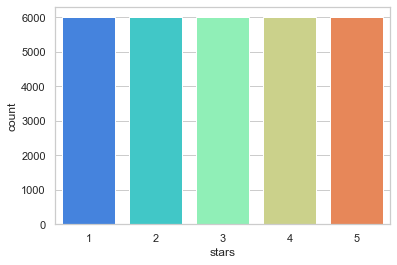

In [40]:
sns.countplot(x = 'stars', data = strat, palette = 'rainbow')

La variable respuesta se encuentra estratificada como el train set inicial.

In [41]:
strat.head()

,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category,text_length,full_text,stop_word_count,char_count,mean_word_length,exclamation_count,punctuation_count,uppercase_count,emojis,emojis_count,sentiment
0,es_0976108,product_es_0294869,reviewer_es_0460801,4,"Producto correcto y parece resistente, lo uso ...",Buena calidad,es,sports,98,Buena calidad . Producto correcto y parece res...,10,114,5.388889,0,2,0,[],0,0.859245
1,es_0368498,product_es_0067616,reviewer_es_0862021,4,Me gusto el producto con su funda suena muy bi...,Completo con funda que es muy como trasporte,es,musical_instruments,214,Completo con funda que es muy como trasporte ....,23,261,4.695652,0,1,0,[],0,1.000000
2,es_0351498,product_es_0466108,reviewer_es_0728496,2,Los pies se van para adelante. Recomiendo una ...,Hawaianas,es,shoes,84,Hawaianas . Los pies se van para adelante. Rec...,11,96,4.388889,0,2,0,[],0,0.727732
3,es_0761708,product_es_0703173,reviewer_es_0937477,3,Esta bien pero para perros de 40 kilos si esti...,Pobre resistencia,es,pet_products,108,Pobre resistencia . Esta bien pero para perros...,12,128,4.375000,0,1,0,[],0,0.000603
4,es_0672475,product_es_0081891,reviewer_es_0005328,3,El pedido ha llegado muy rápido. La entrega mu...,Espero que me cambien el producto,es,toy,175,Espero que me cambien el producto . El pedido ...,19,211,4.729730,0,5,0,[],0,0.949657


### Creamos un corpus para analizar ocurrencias de variables
Crearemos para las reseñas positivas y negativas para visualizar patrones

In [42]:
pos = strat[strat.stars >= 4]
neg = strat[strat.stars <= 2]
neu = strat[strat.stars == 3]

In [43]:
def stars_split(df, corpus):
    for x in df['full_text'].str.split():
        for i in x:
            corpus.append(i)        

In [44]:
corpus_pos = []
corpus_neg = []
corpus_neu = []
lista_corpus = [corpus_pos, corpus_neg]
lista_df_sent = [pos, neg]

In [45]:
import itertools
for i, j in zip(lista_corpus, lista_df_sent):
    stars_split(j, i)

<AxesSubplot:>

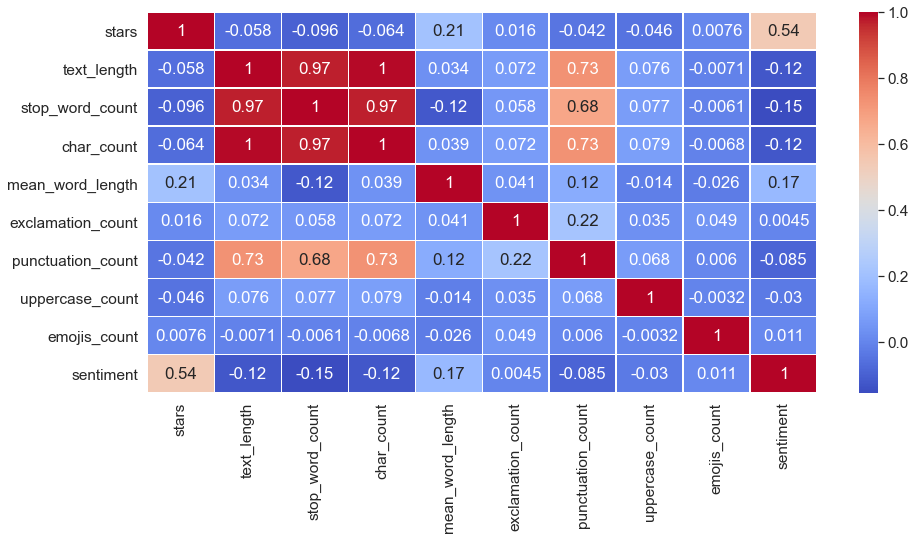

In [46]:
sns.set(font_scale = 1.4)
plt.figure(figsize = (15,7))
sns.heatmap(strat.corr(method='pearson'), cmap = 'coolwarm', annot = True, linewidths = .5)

Por ahora, nuestras variables más importantes para la predicción de la puntuación parecen ser los sentimientos (0.54) y el largo promedio de palabras (0.21). Por otro lado, el largo de texto, la cantidad de stopwords y la cantidad de caracteres están linealmente relacionados entre sí, por lo que lo mejor será limpiar las variables que menos nos sirvan. Tienen cierta relación con los signos de puntuación, pero intentaremos dilucidar con mayor detalle si nos es funcional a nuestra busqueda.

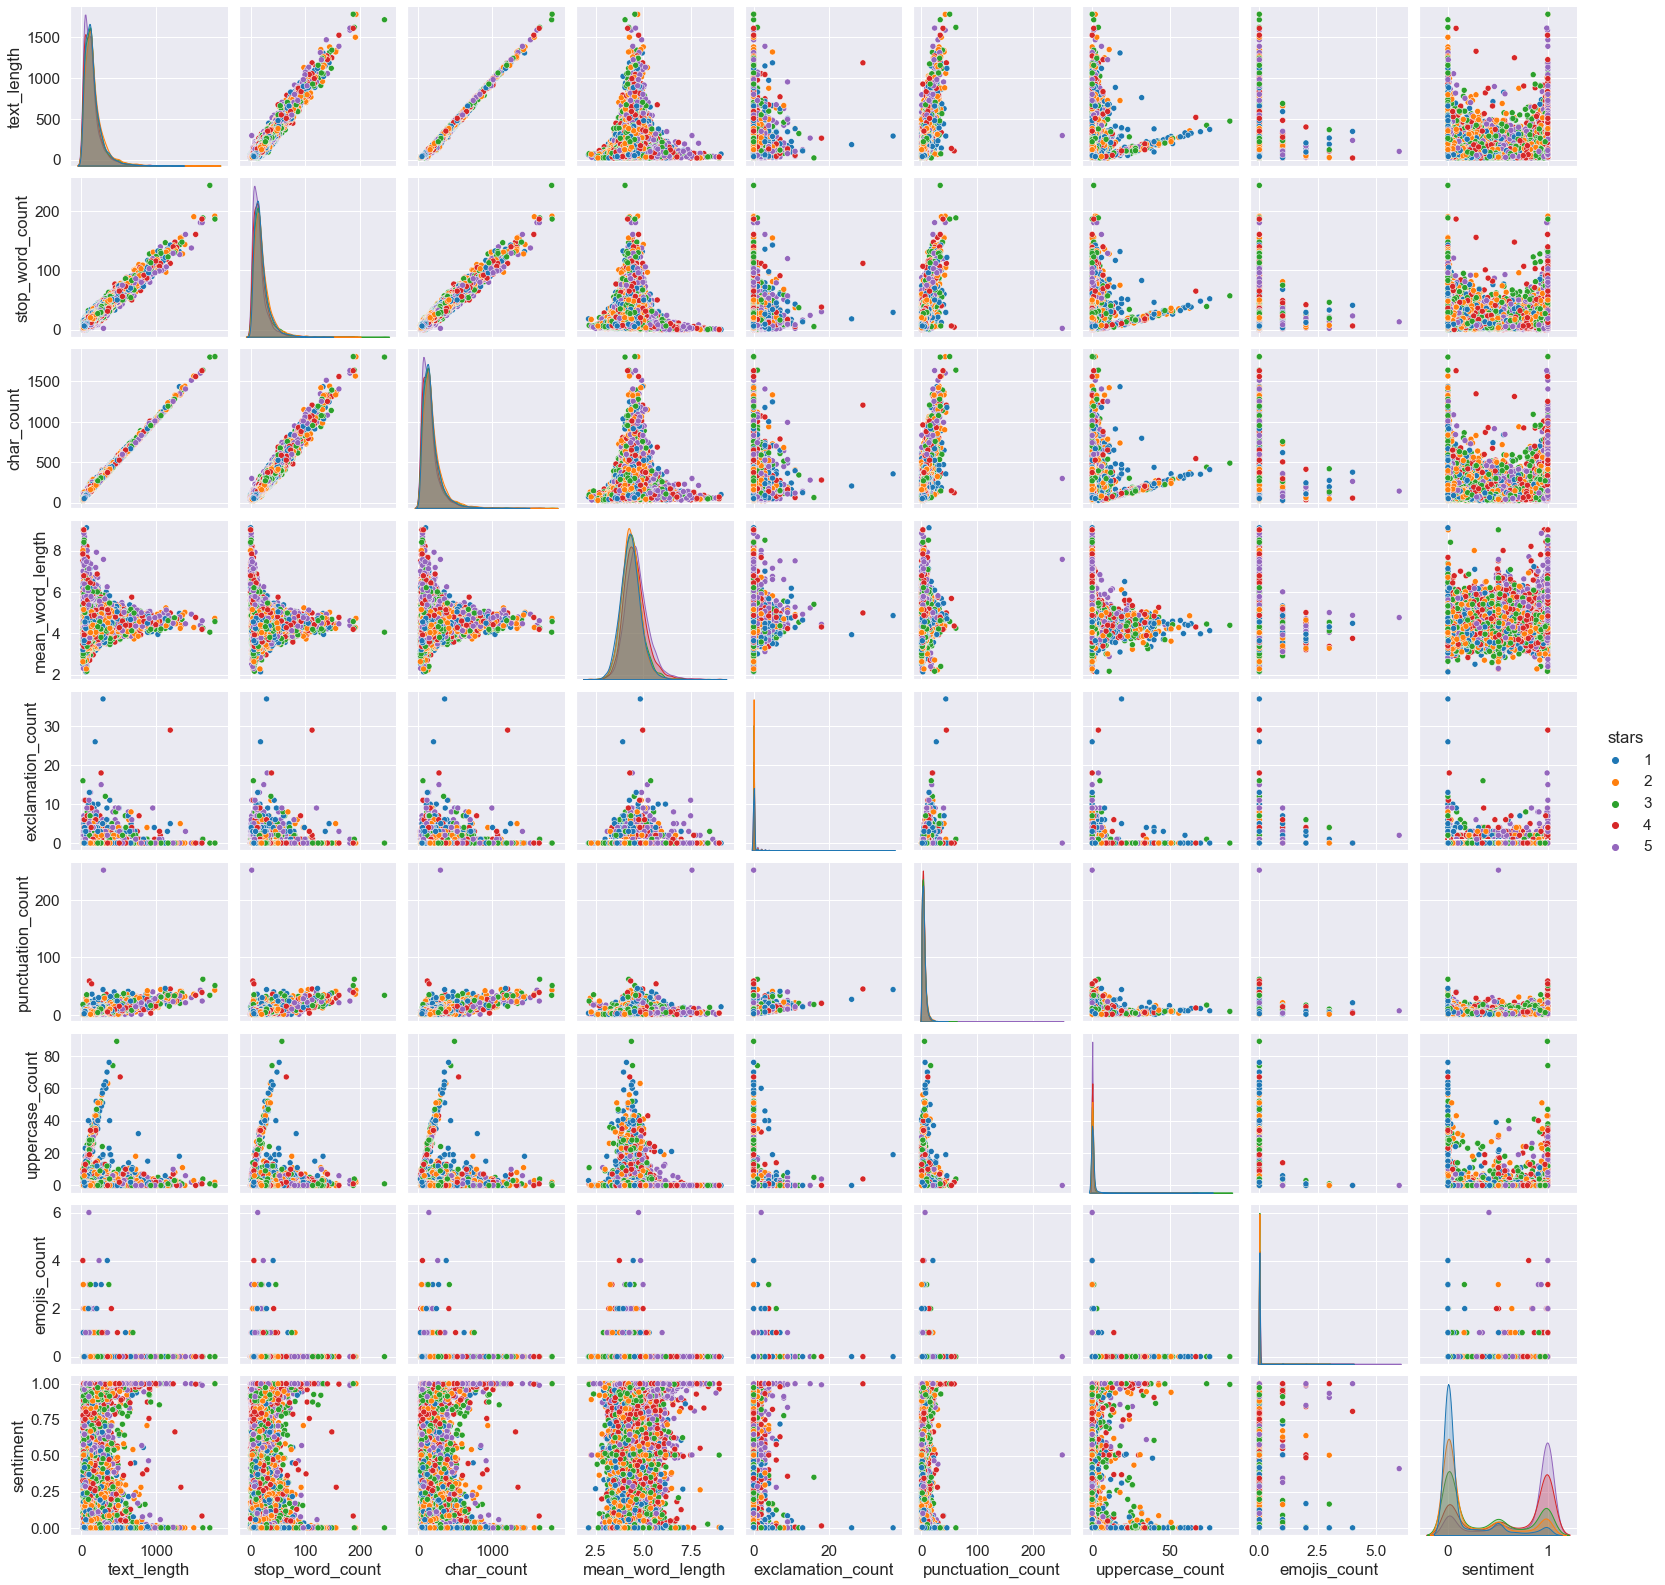

In [47]:
sns.pairplot(strat, hue = 'stars', palette = "tab10")

In [48]:
dev.describe()

,stars,text_length,stop_word_count,char_count,mean_word_length,exclamation_count,punctuation_count,uppercase_count,emojis_count,sentiment
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,3.000000,150.233400,18.182400,172.402000,4.463249,0.122000,4.615400,0.473200,0.005600,4.211815e-01
std,1.414355,127.577135,14.814001,131.173144,0.582831,0.689065,3.684752,3.132865,0.091489,4.316217e-01
min,1.000000,19.000000,0.000000,25.000000,2.200000,0.000000,1.000000,0.000000,0.000000,1.843327e-23
25%,2.000000,70.000000,9.000000,90.000000,4.090909,0.000000,2.000000,0.000000,0.000000,2.132505e-04
50%,3.000000,121.000000,15.000000,141.000000,4.414634,0.000000,4.000000,0.000000,0.000000,2.581643e-01
75%,4.000000,187.000000,23.000000,210.000000,4.769231,0.000000,6.000000,0.000000,0.000000,9.769050e-01
max,5.000000,1576.000000,151.000000,1619.000000,8.444444,15.000000,71.000000,94.000000,3.000000,1.000000e+00


In [49]:
test.describe()

,stars,text_length,stop_word_count,char_count,mean_word_length,exclamation_count,punctuation_count,uppercase_count,emojis_count,sentiment
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5.000000e+03
mean,3.000000,151.914200,18.283600,174.078600,4.471638,0.127600,4.734000,0.499400,0.00660,4.183274e-01
std,1.414355,132.470068,15.421995,135.975706,0.592473,0.759364,4.138438,3.049633,0.13023,4.322547e-01
min,1.000000,20.000000,0.000000,25.000000,2.458333,0.000000,1.000000,0.000000,0.00000,8.542457e-25
25%,2.000000,69.000000,9.000000,90.000000,4.086494,0.000000,2.000000,0.000000,0.00000,2.022237e-04
50%,3.000000,122.000000,15.000000,143.000000,4.428571,0.000000,4.000000,0.000000,0.00000,2.287594e-01
75%,4.000000,186.000000,23.000000,211.000000,4.784266,0.000000,6.000000,0.000000,0.00000,9.807621e-01
max,5.000000,1789.000000,225.000000,1819.000000,9.384615,19.000000,128.000000,63.000000,5.00000,1.000000e+00


In [50]:
strat.describe()

,stars,text_length,stop_word_count,char_count,mean_word_length,exclamation_count,punctuation_count,uppercase_count,emojis_count,sentiment
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04
mean,3.000000,151.783500,18.386067,173.923500,4.454211,0.119633,4.705567,0.475300,0.006133,4.192968e-01
std,1.414237,133.753635,15.607494,137.662066,0.585857,0.727419,4.163915,2.907818,0.105969,4.308299e-01
min,1.000000,16.000000,0.000000,24.000000,2.130435,0.000000,1.000000,0.000000,0.000000,1.581421e-31
25%,2.000000,68.000000,9.000000,87.000000,4.081081,0.000000,2.000000,0.000000,0.000000,1.730472e-04
50%,3.000000,120.000000,14.000000,140.000000,4.407407,0.000000,4.000000,0.000000,0.000000,2.530903e-01
75%,4.000000,186.000000,23.000000,211.000000,4.764706,0.000000,6.000000,0.000000,0.000000,9.718845e-01
max,5.000000,1782.000000,244.000000,1808.000000,9.100000,37.000000,252.000000,89.000000,6.000000,1.000000e+00


### ¿Cuál es el promedio de estrellas de las diferentes categorías?

In [51]:
strat.groupby('product_category')['stars'].describe()

,count,mean,std,min,25%,50%,75%,max
product_category,,,,,,,,
apparel,852.0,2.829812,1.411853,1.0,2.0,3.0,4.0,5.0
automotive,1026.0,2.972710,1.421520,1.0,2.0,3.0,4.0,5.0
baby_product,724.0,3.157459,1.382588,1.0,2.0,3.0,4.0,5.0
beauty,1113.0,2.921833,1.421887,1.0,2.0,3.0,4.0,5.0
book,773.0,3.402329,1.394789,1.0,2.0,4.0,5.0,5.0
camera,449.0,3.044543,1.411930,1.0,2.0,3.0,4.0,5.0
digital_ebook_purchase,258.0,3.461240,1.290661,1.0,3.0,4.0,5.0,5.0
drugstore,814.0,2.955774,1.408290,1.0,2.0,3.0,4.0,5.0
electronics,1580.0,2.879747,1.458558,1.0,2.0,3.0,4.0,5.0


<AxesSubplot:xlabel='product_category', ylabel='stars'>

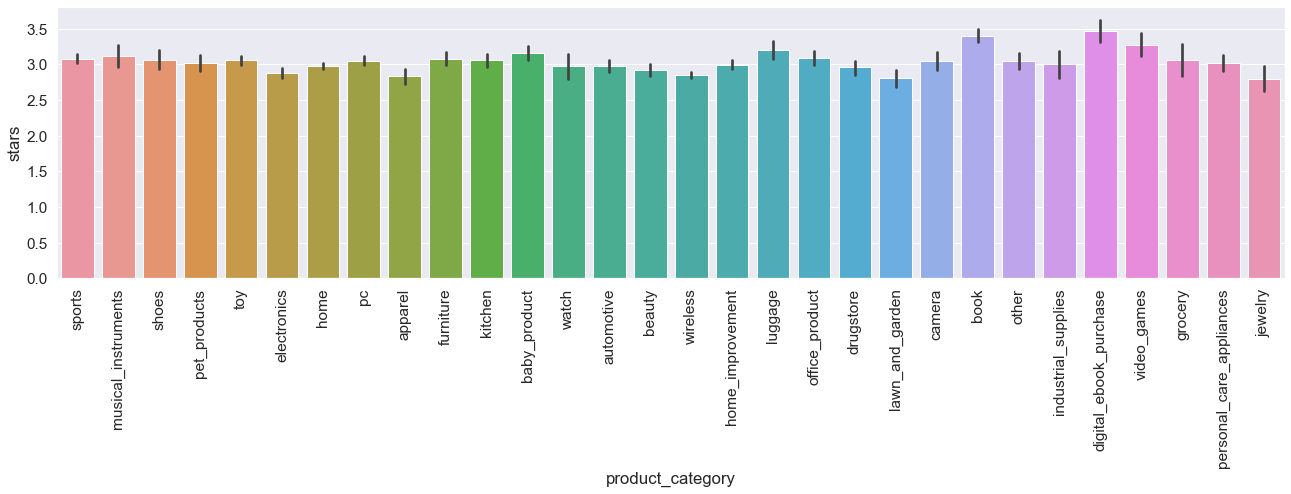

In [52]:
plt.figure(figsize=(22,5))
plt.xticks(rotation = 90)
sns.barplot(data = strat, x = 'product_category', y = 'stars')

La distribución de estrellas se encuentra bastante balanceada a través de las categorías.

### ¿Cuál es el promedio de cantidad de texto según la categoría?

In [53]:
strat.groupby('product_category')['text_length'].describe()

,count,mean,std,min,25%,50%,75%,max
product_category,,,,,,,,
apparel,852.0,122.268779,93.317518,20.0,62.00,112.0,153.00,1336.0
automotive,1026.0,137.907407,113.590622,20.0,61.00,110.0,176.50,815.0
baby_product,724.0,152.745856,117.549149,20.0,74.00,120.0,198.00,834.0
beauty,1113.0,145.607367,125.050074,20.0,66.00,117.0,178.00,1148.0
book,773.0,138.243208,136.420431,20.0,54.00,109.0,170.00,1714.0
camera,449.0,189.249443,155.625868,20.0,92.00,146.0,231.00,1342.0
digital_ebook_purchase,258.0,175.313953,136.744949,20.0,99.25,141.5,210.25,981.0
drugstore,814.0,145.183047,123.751386,20.0,70.00,116.0,172.75,1120.0
electronics,1580.0,169.625316,154.047792,20.0,74.00,125.0,211.00,1468.0


<AxesSubplot:xlabel='product_category', ylabel='text_length'>

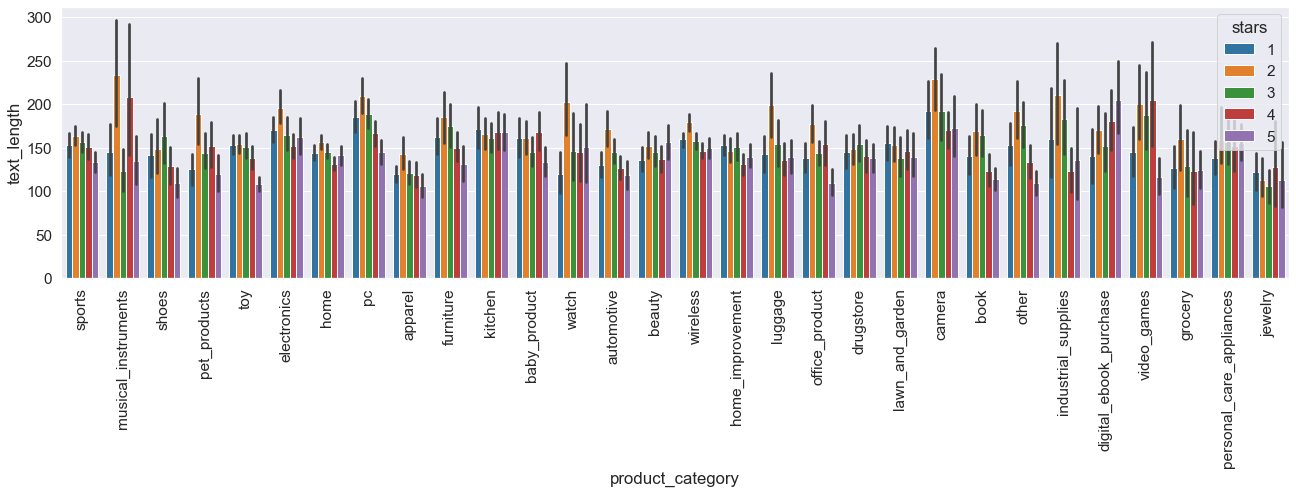

In [54]:
plt.figure(figsize=(22,5))
plt.xticks(rotation = 90)
sns.barplot(data = strat, x = 'product_category', y = 'text_length', hue = 'stars', palette = "tab10" )

El promedio se mantiene constante entre las categorías, pero la desviación estandar es muy alta para todos, lo que significa que tenemos mucha variabilidad en la cantidad de texto. Por otra parte, el gráfico parece indicar que la gente escribe más cuando puntúa con 2 estrellas, repitiendose la misma tendencia en todas las categorías. Sin embargo la varianza es muy alta. Ocurre lo opuesto cuando la opinión sobre el producto es muy buena y se le asigna 5 estrellas.

### Análisis del largo de texto

<AxesSubplot:title={'center':'Dev set'}, xlabel='text_length', ylabel='Count'>

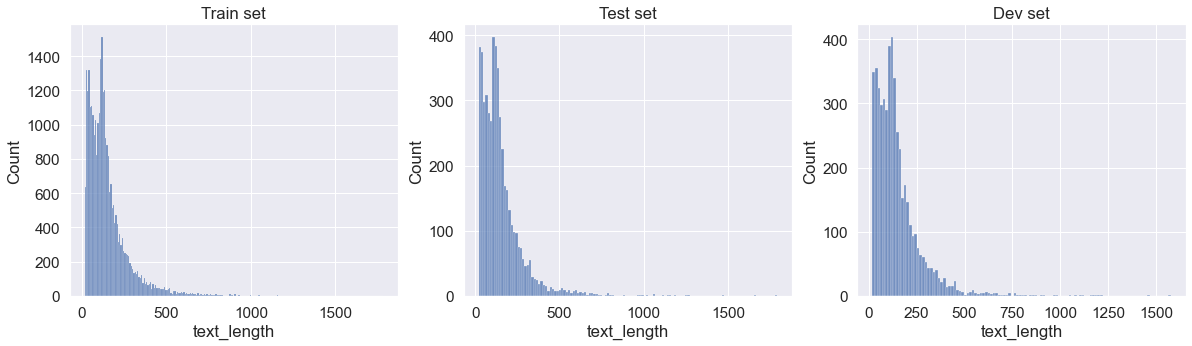

In [55]:
f = plt.figure(figsize=(20,5))

ax = f.add_subplot(131)
ax.set_title("Train set")
sns.histplot(strat.text_length, ax=ax)
ax1 = f.add_subplot(132)
ax1.set_title("Test set")
sns.histplot(test.text_length, ax=ax1)
ax2 = f.add_subplot(133)
ax2.set_title("Dev set")
sns.histplot(dev.text_length, ax=ax2)

### ¿Hay alguna relación entre el largo de texto y la cantidad de estrellas?

(0.0, 1000.0)

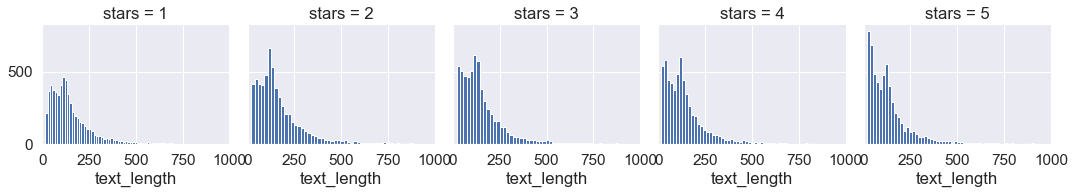

In [56]:
g = sns.FacetGrid(strat, col = 'stars')
g.map(plt.hist,'text_length', bins = 100)
plt.xlim(0,1000)

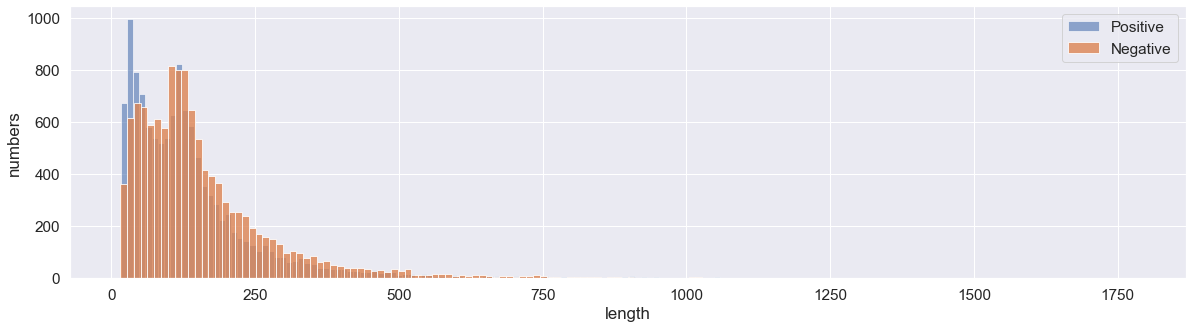

In [57]:
f = plt.figure(figsize=(20,5))
bins = 150
plt.hist(pos['text_length'], alpha = 0.6, bins=bins, label='Positive')
plt.hist(neg['text_length'], alpha = 0.8, bins=bins, label='Negative')
plt.xlabel('length')
plt.ylabel('numbers')
plt.legend(loc='upper right')


Volvemos a notar que la gente suele escribir menos cuando se trata de un excelente producto

<AxesSubplot:xlabel='stars', ylabel='text_length'>

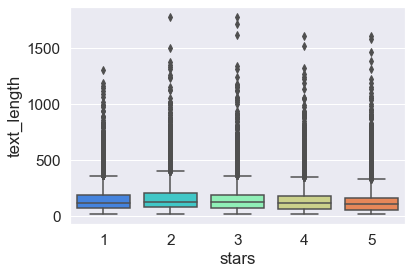

In [58]:
sns.boxplot(x = 'stars', y = 'text_length', data = strat, palette = 'rainbow')

La distribución de reseñas se encuentra balanceada e igual representada para todas las estrellas. Esto se repite para todos los datasets.

### Análisis de largo promedio de palabras

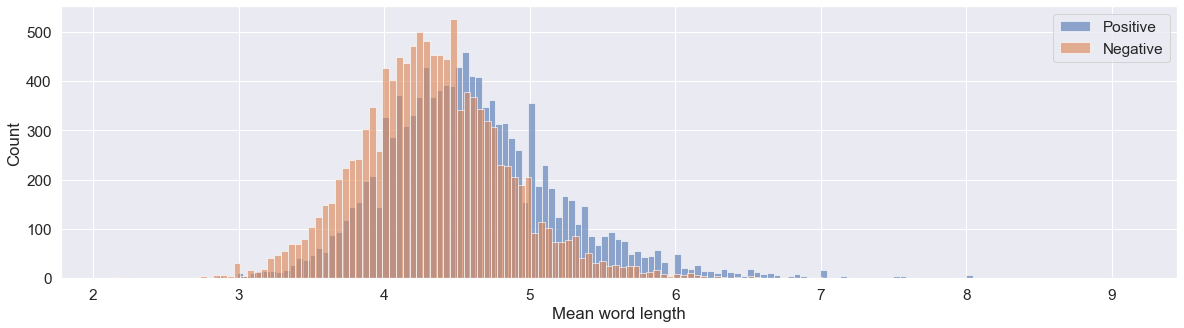

In [59]:
plt.figure(figsize = (20,5))
bins = 150
plt.hist(strat[strat['stars'] >= 4]['mean_word_length'], alpha = 0.6, bins=bins, label='Positive')
plt.hist(strat[strat['stars'] <= 2]['mean_word_length'], alpha = 0.6, bins=bins, label='Negative')
plt.xlabel('Mean word length')
plt.ylabel('Count')
plt.legend(loc = 'upper right')
#plt.xlim(0,150)

<AxesSubplot:xlabel='stars', ylabel='mean_word_length'>

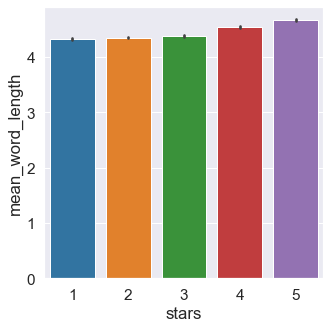

In [60]:
plt.figure(figsize=(5,5))
sns.barplot(data = strat, x = 'stars', y = 'mean_word_length', palette = "tab10")

Interesante gráfico donde vemos que el largo promedio de palabra aumenta a medida que sube la puntuación.

### Análisis de cantidad de palabras mayúsculas

<AxesSubplot:xlabel='stars', ylabel='uppercase_count'>

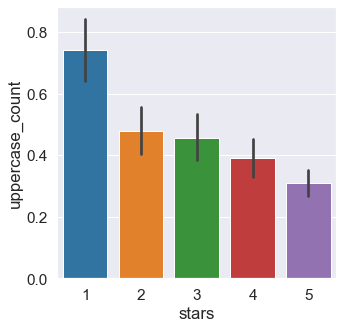

In [61]:
plt.figure(figsize=(5,5))
sns.barplot(data = strat, x = 'stars', y = 'uppercase_count', palette = "tab10")

Vemos una clara tendencia en el uso de las mayúsculas, principalmente relacionada a las bajas puntuaciones. Desciende fuertemente en el puntaje más alto.

### Análisis de sentimientos

<AxesSubplot:xlabel='sentiment', ylabel='stars'>

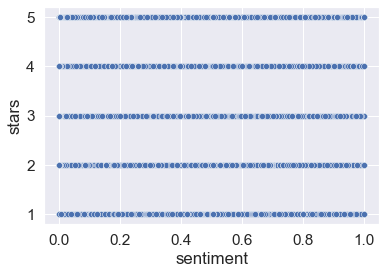

In [62]:
sns.scatterplot(data = strat, x = 'sentiment', y = 'stars')

El análisis de sentimiento no parece predecir con exactitud la variable respuesta, pero como vimos en las correlaciones, nos va a ser útil para el modelo.

### Análisis de cantidad de caracteres

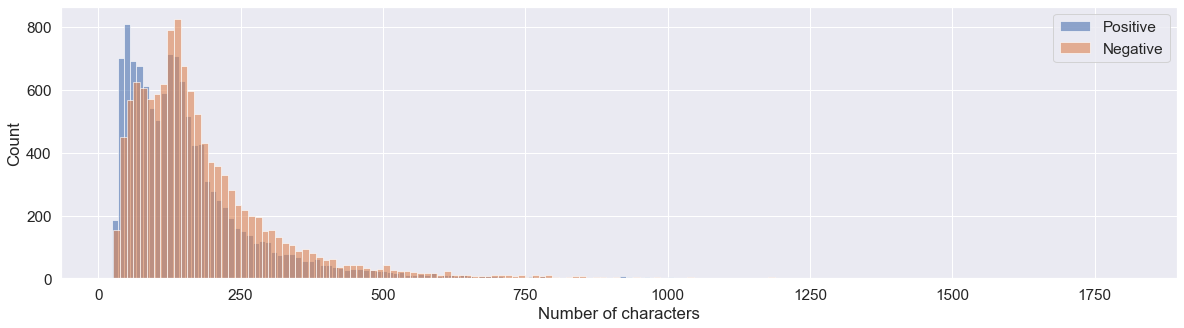

In [63]:
plt.figure(figsize = (20,5))
bins = 150
plt.hist(strat[strat['stars'] >= 4]['char_count'], alpha = 0.6, bins=bins, label='Positive')
plt.hist(strat[strat['stars'] <= 2]['char_count'], alpha = 0.6, bins=bins, label='Negative')
plt.xlabel('Number of characters')
plt.ylabel('Count')
plt.legend(loc = 'upper right')
#plt.xlim(0,1000)

Gran cantidad de comentarios positivos tienen pocos caracteres.

### Análisis de stopwords

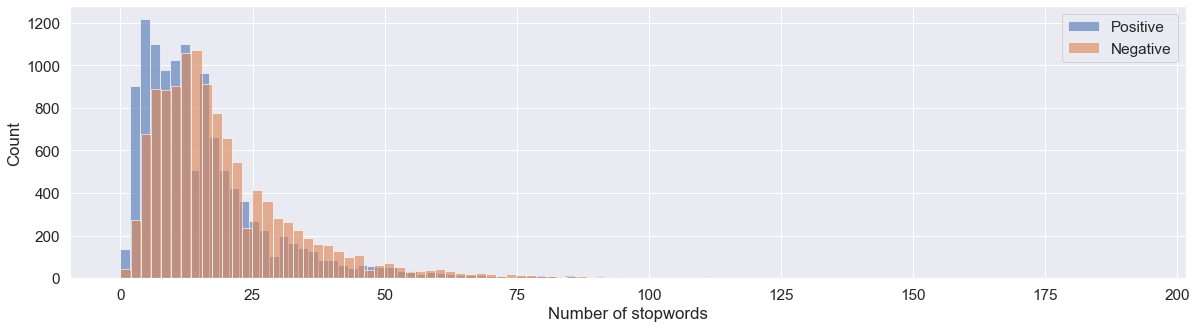

In [64]:
plt.figure(figsize = (20,5))
bins = 100
plt.hist(strat[strat['stars'] >= 4]['stop_word_count'], alpha = 0.6, bins=bins, label='Positive')
plt.hist(strat[strat['stars'] <= 2]['stop_word_count'], alpha = 0.6, bins=bins, label='Negative')
plt.xlabel('Number of stopwords')
plt.ylabel('Count')
plt.legend(loc = 'upper right')
#plt.xlim(0,150)

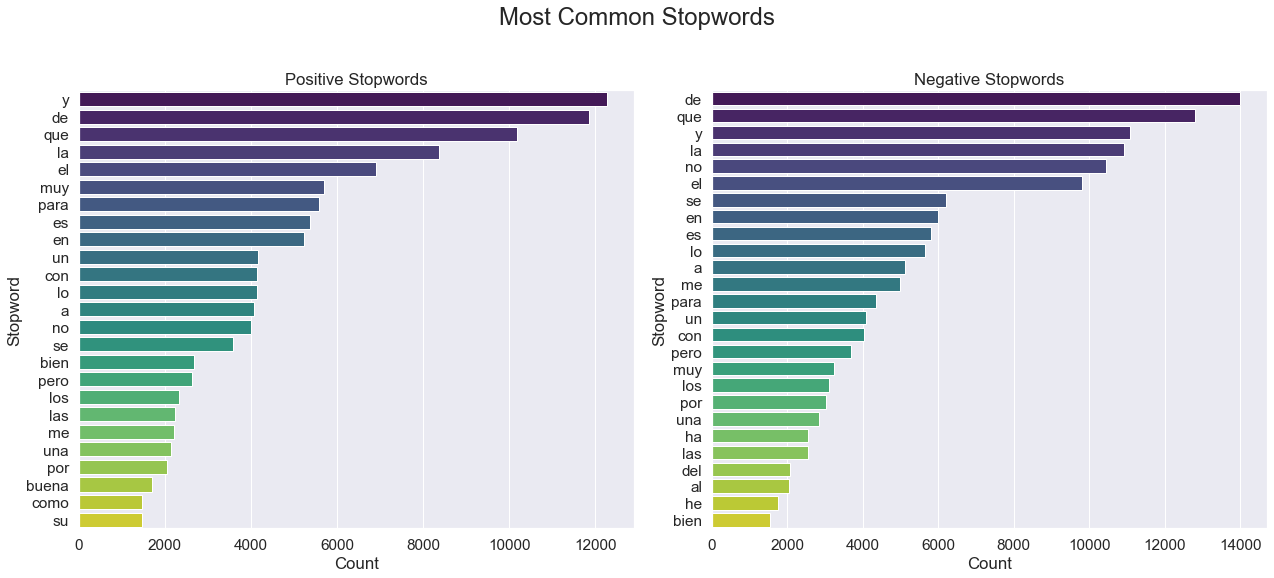

In [65]:
fig, axes = plt.subplots(1, 2, figsize=(18, 8))
axes = axes.flatten()

for i, j in zip(lista_corpus, axes):

    counter = Counter(i)
    most = counter.most_common()
    x, y = [], []
    for word, count in most[:30]:
            if (word in stopwords):
                x.append(word)
                y.append(count)
                sns.barplot(x = y, y = x, palette = "viridis", ax = j)

axes[0].set_title('Positive Stopwords')

axes[1].set_title('Negative Stopwords')
axes[0].set_xlabel('Count')
axes[0].set_ylabel('Stopword')
axes[1].set_xlabel('Count')
axes[1].set_ylabel('Stopword')

fig.suptitle('Most Common Stopwords', fontsize=24, va='baseline')
plt.tight_layout()

### Análisis de Emojis

In [66]:
pos_emojis = []
for text in pos['full_text'].str.split():
    for word in text:
        if word in UNICODE_EMO:
            demojized = emoji.demojize(word)
            pos_emojis.append(demojized)

In [67]:
neg_emojis = []
for text in neg['full_text'].str.split():
    for word in text:
        if word in UNICODE_EMO:
            demojized = emoji.demojize(word)
            neg_emojis.append(demojized)

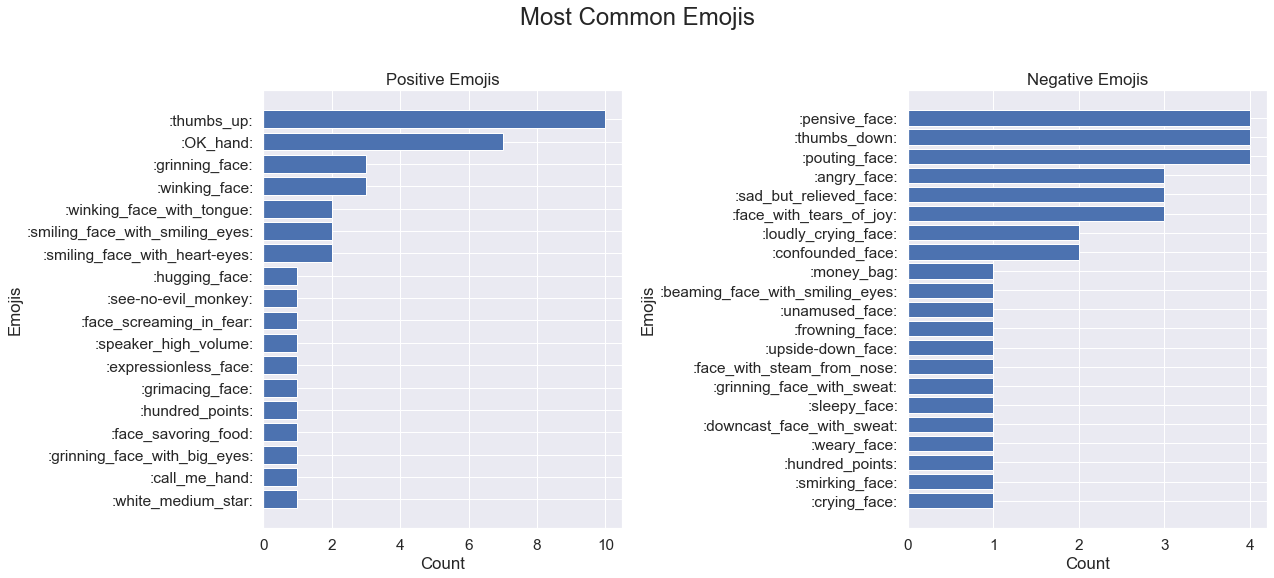

In [68]:
fig, axes = plt.subplots(1, 2, figsize=(18, 8))
axes = axes.flatten()

lista_emojis = [pos_emojis, neg_emojis]

for i, j in zip(lista_emojis, axes):

    dic = defaultdict(int)
    
    for k in i:
        dic[k] += 1
    listofTuples = sorted(dic.items() ,  key = lambda x: x[1], reverse = True)
    dic = dict(listofTuples)
    x, y = [],[]    
    x, y = zip(*dic.items())
    j.barh(x, y)
    j.invert_yaxis()

axes[0].set_title('Positive Emojis')

axes[1].set_title('Negative Emojis')
axes[0].set_xlabel('Count')
axes[0].set_ylabel('Emojis')
axes[1].set_xlabel('Count')
axes[1].set_ylabel('Emojis')

fig.suptitle('Most Common Emojis', fontsize=24, va='baseline')
plt.tight_layout()

Si bien son pocos los datos con emojis, tienen una utilidad clara para diferenciar sentimientos y lo vemos en las diferencias entre ambos gráficos.

<AxesSubplot:xlabel='stars', ylabel='emojis_count'>

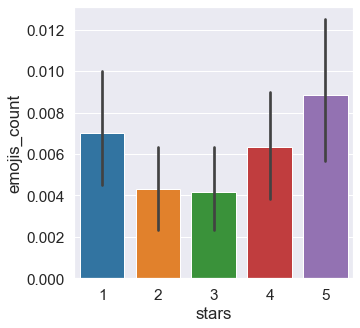

In [69]:
plt.figure(figsize=(5,5))
sns.barplot(data = strat, x = 'stars', y = 'emojis_count', palette = "tab10")

Muy pocos emojis para la cantidad de instancias.

### Análisis de signos de puntuación

(0.0, 50.0)

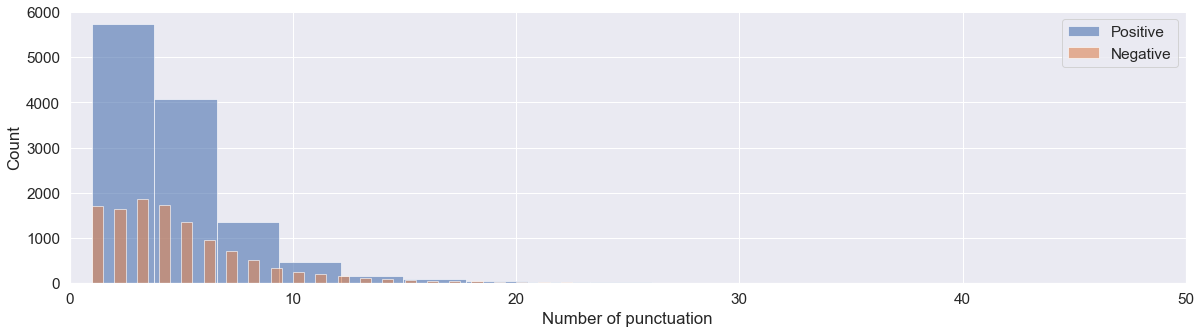

In [70]:
plt.figure(figsize = (20,5))
bins = 90
plt.hist(strat[strat['stars'] >= 4]['punctuation_count'], alpha = 0.6, bins=bins, label='Positive')
plt.hist(strat[strat['stars'] <= 2]['punctuation_count'], alpha = 0.6, bins=bins, label='Negative')
plt.xlabel('Number of punctuation')
plt.ylabel('Count')
plt.legend(loc = 'upper right')
plt.xlim(0,50)

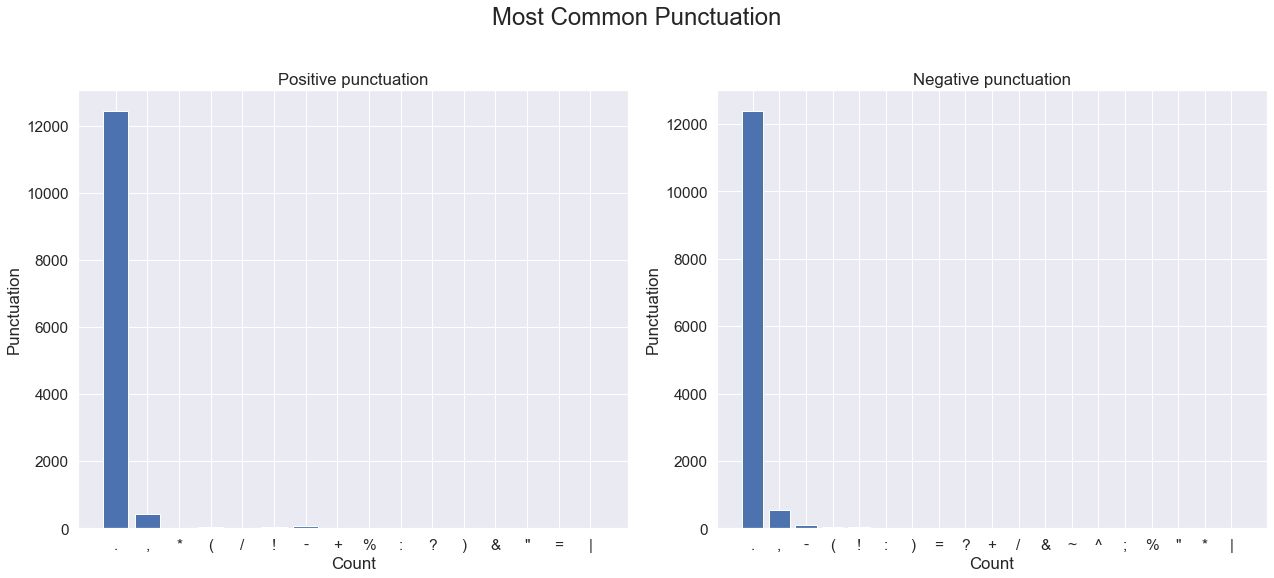

In [71]:
fig, axes = plt.subplots(1, 2, figsize=(18, 8))
axes = axes.flatten()

for i, j in zip(lista_corpus, axes):

    dic = defaultdict(int)
    
    for k in i:
        if k in stopwords_punct:
            dic[k] += 1
    x, y = [],[]    
    x, y = zip(*dic.items())
    j.bar(x, y)

axes[0].set_title('Positive punctuation')

axes[1].set_title('Negative punctuation')
axes[0].set_xlabel('Count')
axes[0].set_ylabel('Punctuation')
axes[1].set_xlabel('Count')
axes[1].set_ylabel('Punctuation')

fig.suptitle('Most Common Punctuation', fontsize=24, va='baseline')
plt.tight_layout()

No hay tendencias apreciables. Veamos con los signos de exclamación.

<AxesSubplot:xlabel='stars', ylabel='exclamation_count'>

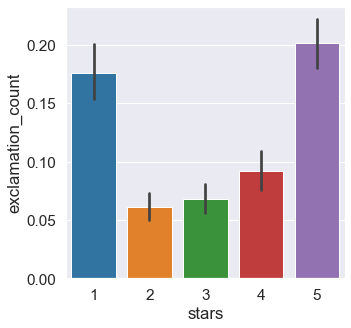

In [72]:
plt.figure(figsize=(5,5))
sns.barplot(data = strat, x = 'stars', y = 'exclamation_count', palette = "tab10")

Se distribuyen en espejo, con una clara presencia para las opiniones con 1 estrella y 5 estrellas

### Análisis de reseñas por comprador
Vamos a ver si hay algún dato útil o anomalía en la gente que compró mucho

In [73]:
top_reviewers = strat['reviewer_id'].value_counts().reset_index(name = 'frequency')
top_reviewers.rename(columns = {'index' : 'reviewer_id'}, inplace=True)
top_reviewers

,reviewer_id,frequency
0,reviewer_es_0089611,4
1,reviewer_es_0154228,3
2,reviewer_es_0986000,3
3,reviewer_es_0234223,3
4,reviewer_es_0599409,3
...,...,...
29451,reviewer_es_0166500,1
29452,reviewer_es_0672906,1
29453,reviewer_es_0828596,1
29454,reviewer_es_0924125,1


<AxesSubplot:xlabel='frequency', ylabel='count'>

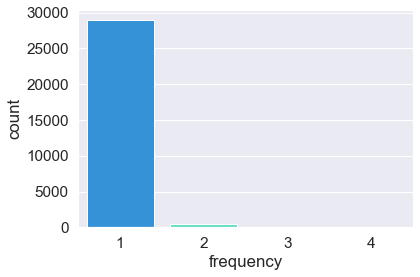

In [74]:
sns.countplot(x = 'frequency', data = top_reviewers, palette = 'rainbow')

### Análisis de reseñas por producto
Veremos si hay productos que tuvieron más reseñas que otros

In [75]:
top_products = strat['product_id'].value_counts().reset_index(name = 'frequency')
top_products.rename(columns = {'index' : 'product_id'}, inplace=True)
top_products

,product_id,frequency
0,product_es_0073408,4
1,product_es_0361413,4
2,product_es_0463046,3
3,product_es_0152109,3
4,product_es_0909629,3
...,...,...
28626,product_es_0583456,1
28627,product_es_0307222,1
28628,product_es_0678815,1
28629,product_es_0979561,1


<AxesSubplot:xlabel='frequency', ylabel='count'>

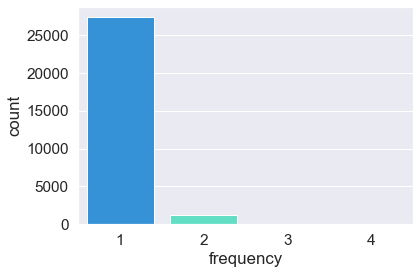

In [76]:
sns.countplot(x = 'frequency', data = top_products, palette = 'rainbow')

No encontramos ninguna anomalía.

### Conclusiones
Vimos algunas tendencias en las variables de cantidad de palabras mayúsculas, el largo promedio por palabra, los sentimientos y largo de texto.

Los signos de exclamación parecen ser de ayuda para predecir 1 y 5 estrellas, pero no aparecen en gran cantidad de comentarios, al igual que los emojis.
A mayor cantidad de palabras mayúsculas, menor la puntuación. El largo promedio de las palabras tiene un leve incremento a medida que mejora la puntuación, y también vimos que baja la cantidad de texto - palabras - caracteres.

Por último vamos a revisar las correlaciones Spearman que puede captar relaciones entre variables incluso si no son lineales.

In [77]:
def spearman(frame, features):
    spr = pd.DataFrame()
    spr['feature'] = features
    spr['spearman'] = [frame[f].corr(frame['stars'], 'spearman') for f in features]
    spr = spr.sort_values('spearman')
    plt.figure(figsize = (20, 0.5*len(features)))
    sns.barplot(data = spr, y = 'feature', x = 'spearman', orient='h')

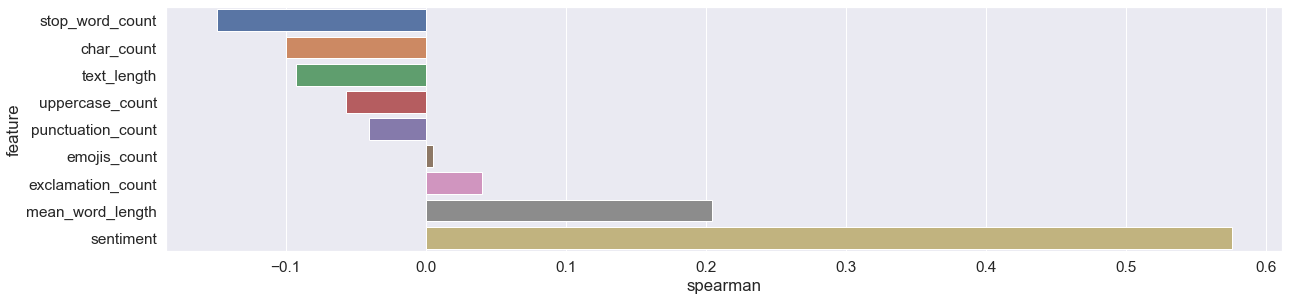

In [78]:
quantitative = [f for f in strat.columns if strat.dtypes[f] != 'object']
quantitative.remove('stars')
features = quantitative
spearman(strat, features)

La variable con mayor relación a las estrellas es el sentimiento. Vemos también que algunas de las otras variables son rescatables para el modelo de aprendizaje.

## **3. Normalización de texto** 
A continuación y a modo pedagógico, vamos a demostrar los pasos de normalización con un solo review, y luego lo haremos para el conjunto de datos.
Regular expressions, lowercasing, splitting, tokenizing, stemming

### **Regular expressions**

In [79]:
#Original Sentence
mensaje = strat["review_body"].max()
mensaje

'😂 una broma 😂 Lo he comprado por los comentarios que tenía ,fijarme un pocco más me he dado cuenta que los comentarios son una mentira,por la traducción y la manera de expresar 😂 no vale para nada y para purificar ni nada,lo he probado unos días antes de devolverlo'

Aparecen algunos emojis en el mensaje con mayor cantidad de texto. Lo vamos a considerar para cuando procesemos todo el dataset, ya que pueden indicar comportamientos importantes.

In [80]:
mensaje_regex = re.sub('[^a-zA-Z]',' ', mensaje)
mensaje_regex

'  una broma   Lo he comprado por los comentarios que ten a  fijarme un pocco m s me he dado cuenta que los comentarios son una mentira por la traducci n y la manera de expresar   no vale para nada y para purificar ni nada lo he probado unos d as antes de devolverlo'

En este caso la limpieza de caracteres especiales puede perjudicar la comprensión de las palabras en español. Probemos con otro patrón.

In [81]:
mensaje_regex = re.sub("[^a-zA-ZñÑáéíóúÁÉÍÓÚ\s]+",'', mensaje)
mensaje_regex

' una broma  Lo he comprado por los comentarios que tenía fijarme un pocco más me he dado cuenta que los comentarios son una mentirapor la traducción y la manera de expresar  no vale para nada y para purificar ni nadalo he probado unos días antes de devolverlo'

Perfecto, ahora podemos conservar los caracteres especiales del español para poder extraer la raíz de la palabra

### **Tokenización y lowercasing**

In [82]:
print(sent_tokenize(mensaje))

['😂 una broma 😂 Lo he comprado por los comentarios que tenía ,fijarme un pocco más me he dado cuenta que los comentarios son una mentira,por la traducción y la manera de expresar 😂 no vale para nada y para purificar ni nada,lo he probado unos días antes de devolverlo']


In [83]:
for sent in sent_tokenize(mensaje):
    print(word_tokenize(sent))

['😂', 'una', 'broma', '😂', 'Lo', 'he', 'comprado', 'por', 'los', 'comentarios', 'que', 'tenía', ',', 'fijarme', 'un', 'pocco', 'más', 'me', 'he', 'dado', 'cuenta', 'que', 'los', 'comentarios', 'son', 'una', 'mentira', ',', 'por', 'la', 'traducción', 'y', 'la', 'manera', 'de', 'expresar', '😂', 'no', 'vale', 'para', 'nada', 'y', 'para', 'purificar', 'ni', 'nada', ',', 'lo', 'he', 'probado', 'unos', 'días', 'antes', 'de', 'devolverlo']


In [84]:
mensaje_tokenized_lowered = list(map(str.lower, word_tokenize(mensaje)))
print(mensaje_tokenized_lowered)

['😂', 'una', 'broma', '😂', 'lo', 'he', 'comprado', 'por', 'los', 'comentarios', 'que', 'tenía', ',', 'fijarme', 'un', 'pocco', 'más', 'me', 'he', 'dado', 'cuenta', 'que', 'los', 'comentarios', 'son', 'una', 'mentira', ',', 'por', 'la', 'traducción', 'y', 'la', 'manera', 'de', 'expresar', '😂', 'no', 'vale', 'para', 'nada', 'y', 'para', 'purificar', 'ni', 'nada', ',', 'lo', 'he', 'probado', 'unos', 'días', 'antes', 'de', 'devolverlo']


### **Stopwords y puntuación**

In [85]:
print('With combined stopwords:')
print([word for word in mensaje_tokenized_lowered if word not in stoplist_combined])

With combined stopwords:
['😂', 'broma', '😂', 'comprado', 'comentarios', 'fijarme', 'pocco', 'comentarios', 'mentira', 'traducción', 'expresar', '😂', 'vale', 'purificar', 'probado', 'devolverlo']


### **Stemming**
El Stemming es un proceso heurístico que recorta la terminación de las palabras, agrupándolas por su raiz. Así reduciremos las palabras diferentes en nuestro dataset.

In [86]:
#STEMMING
words  = nltk.tokenize.WhitespaceTokenizer().tokenize(mensaje)
words = [word for word in words if word not in stoplist_combined]
df = pd.DataFrame()
df['OriginalWords'] = pd.Series(words)

#porter's stemmer
porterStemmedWords = [nltk.stem.PorterStemmer().stem(word) for word in words]
df['PorterStemmedWords'] = pd.Series(porterStemmedWords)

#SnowBall stemmer
snowballStemmedWords = [nltk.stem.SnowballStemmer("spanish").stem(word) for word in words]
df['SnowballStemmedWords'] = pd.Series(snowballStemmedWords)
df


,OriginalWords,PorterStemmedWords,SnowballStemmedWords
0,😂,😂,😂
1,broma,broma,brom
2,😂,😂,😂
3,Lo,Lo,lo
4,comprado,comprado,compr
5,comentarios,comentario,comentari
6,",fijarme",",fijarm",",fij"
7,pocco,pocco,pocc
8,comentarios,comentario,comentari
9,"mentira,por","mentira,por","mentira,por"


Parece que el stemmer no es capaz de comprender la raíz de las palabras. Vamos a ver si con Lemmatization nos va mejor.

### **Lemmatization**
Similar al 'Stemming' pero más técnico, ya que intenta realizar el proceso teniendo en cuenta cuál es el rol que la palabra cumple en el texto. Esto quiere decir que su accionar será distinto si la palabra a lemmantizar está actuando como verbo, sustantivo, etc. 

In [87]:
def get_wordnet_pos(word):
    """Map POS tag to first character lemmatize() accepts"""
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}

    return tag_dict.get(tag, wordnet.NOUN)

In [88]:
#python -m nltk.downloader averaged_perceptron_tagger
frase_tokens = nltk.tokenize.WhitespaceTokenizer().tokenize(mensaje)
frase_lemma = [nltk.stem.WordNetLemmatizer().lemmatize(w, get_wordnet_pos(w)) for w in frase_tokens]
tipo_palabra = [get_wordnet_pos(w) for w in nltk.tokenize.WhitespaceTokenizer().tokenize(mensaje)]

#lemmatization results 
df = pd.DataFrame()
df['OriginalWords'] = pd.Series(frase_tokens)
df['WordType'] = pd.Series(tipo_palabra)
#WordNet Lemmatization
df['WordNetLemmatizer'] = pd.Series(frase_lemma)
df

,OriginalWords,WordType,WordNetLemmatizer
0,😂,n,😂
1,una,n,una
2,broma,n,broma
3,😂,n,😂
4,Lo,n,Lo
5,he,n,he
6,comprado,n,comprado
7,por,n,por
8,los,n,los
9,comentarios,n,comentarios


No parece hacer casi nada. Vamos a probar con otra libreria, porque WordNetLemmatizer asume que todos son sustantivos. 

## SpaCy

Probamos una variante de spacy, pero nos resultó bastante bien la versión original.

In [89]:
doc = nlp(mensaje)
print([(w.text, w.pos_) for w in doc])

[('😂', 'PUNCT'), ('una', 'DET'), ('broma', 'NOUN'), ('😂', 'ADJ'), ('Lo', 'PRON'), ('he', 'AUX'), ('comprado', 'VERB'), ('por', 'ADP'), ('los', 'DET'), ('comentarios', 'NOUN'), ('que', 'SCONJ'), ('tenía', 'AUX'), (',', 'PUNCT'), ('fijarme', 'VERB'), ('un', 'DET'), ('pocco', 'NOUN'), ('más', 'ADV'), ('me', 'PRON'), ('he', 'AUX'), ('dado', 'VERB'), ('cuenta', 'NOUN'), ('que', 'SCONJ'), ('los', 'DET'), ('comentarios', 'NOUN'), ('son', 'VERB'), ('una', 'DET'), ('mentira', 'NOUN'), (',', 'PUNCT'), ('por', 'ADP'), ('la', 'DET'), ('traducción', 'NOUN'), ('y', 'CCONJ'), ('la', 'DET'), ('manera', 'NOUN'), ('de', 'ADP'), ('expresar', 'VERB'), ('😂', 'INTJ'), ('no', 'ADV'), ('vale', 'VERB'), ('para', 'ADP'), ('nada', 'PRON'), ('y', 'CCONJ'), ('para', 'ADP'), ('purificar', 'VERB'), ('ni', 'CCONJ'), ('nada', 'PRON'), (',', 'PUNCT'), ('lo', 'PRON'), ('he', 'AUX'), ('probado', 'VERB'), ('unos', 'DET'), ('días', 'NOUN'), ('antes', 'ADV'), ('de', 'ADP'), ('devolverlo', 'VERB')]


In [90]:
#python -m nltk.downloader averaged_perceptron_tagger
frase_tokens = nlp(mensaje)
frase_lemma = [w.lemma_ for w in nlp(mensaje)]
tipo_palabra = [tipo.pos_ for tipo in nlp(mensaje)]

#lemmatization results 
df = pd.DataFrame()
df['OriginalWords'] = pd.Series(frase_tokens)
df['WordType'] = pd.Series(tipo_palabra)
#WordNet Lemmatization
df['Lemma'] = pd.Series(frase_lemma)
df

,OriginalWords,WordType,Lemma
0,😂,PUNCT,😂
1,una,DET,un
2,broma,NOUN,bromar
3,😂,ADJ,😂
4,Lo,PRON,lo
5,he,AUX,haber
6,comprado,VERB,comprar
7,por,ADP,por
8,los,DET,el
9,comentarios,NOUN,comentario


Ahora vemos como identifica correctamente el lema y el tipo de palabra como queríamos, para algunos casos. Deberíamos antes eliminar los signos de puntuación y las stopwords.

### Named Entity Recognition

In [91]:
doc = nlp(mensaje)

text = []
start = []
end = []
label = []
explain = []

for ent in doc.ents:
    text.append(ent.text)
    start.append(ent.start_char)
    end.append(ent.end_char)
    label.append(ent.label_)
    explain.append(spacy.explain(ent.label_))

df = pd.DataFrame()
df['text'] = pd.Series(text)
df['start_char'] = pd.Series(start)
df['end_char'] = pd.Series(end)
df['label'] = pd.Series(label)
df['explained_label'] = pd.Series(explain)
df

,text,start_char,end_char,label,explained_label
0,Lo he comprado por los comentarios,14,48,MISC,"Miscellaneous entities, e.g. events, nationali..."


In [92]:
displacy.render(doc, style="ent", jupyter = True)

In [93]:
displacy.render(doc, style="dep", jupyter = True)

## **4. Preparación de datos para modelos de aprendizaje**
Aplicamos todos los procesos vistos a todo el texto compilado (reseña + título) para luego vectorizar. 

### Probamos la normalización

In [94]:
review = strat['full_text'].max()
review

'🤗 . Bonitos pero entre los banderines hay mucha distancia pero son de buena calidad'

In [95]:
review = re.sub("[^a-zA-ZñÑáéíóúÁÉÍÓÚ\s]+",'', review)
review

'  Bonitos pero entre los banderines hay mucha distancia pero son de buena calidad'

In [96]:
review = nlp(review)
review

  Bonitos pero entre los banderines hay mucha distancia pero son de buena calidad

In [97]:
review = [w.lemma_ for w in review]
review

['  ',
 'bonitos',
 'pero',
 'entre',
 'el',
 'banderín',
 'haber',
 'mucho',
 'distanciar',
 'pero',
 'ser',
 'de',
 'bueno',
 'calidad']

In [98]:
stop_review = [word for word in review if word not in stoplist_combined]
stop_review

['  ', 'bonitos', 'banderín', 'distanciar', 'calidad']

In [99]:
long_words = [word for word in stop_review if len(word)>3]
long_words

['bonitos', 'banderín', 'distanciar', 'calidad']

In [100]:
review = " ".join(long_words)
review

'bonitos banderín distanciar calidad'

### Creamos un loop para normalizar todo el texto
Esta función va a tardar bastante, cerca de 2 horas dependiendo de la pc, ya que tiene que procesar muchos datos. Con tqdm podemos visualizar el progreso. Una vez terminado el proceso, se guarda el resultado en un dataset para utilizarlo en el entrenamiento de modelos de aprendizaje y no tener que volver a correr el loop.

In [101]:
def text_normalizer(df):
    
    corpus = []
    
    for rw in tqdm(df['full_text']):
        

        # Replace any special caracter out of the spanish language with a space
        review = re.sub("[^a-zA-ZñÑáéíóúÁÉÍÓÚ\s]+",'', rw)

        # Lowercase every character
        review = review.lower()

        # Apply spacy function
        review = nlp(review)

        #Lemmatize the text
        review = [w.lemma_ for w in review]

        #Remove stopwords from the text
        review = [word for word in review if word not in stoplist_combined]
        
        #Remove words with 3 characters or less
        review = [word for word in review if len(word)>3]

        #Join everything in a single string
        review = " ".join(review)

        #Append the string to the corpus
        corpus.append(review)
        
    return corpus
        

### Actualizamos los datos del dataset

In [102]:
strat_corpus = text_normalizer(strat)

100%|██████████| 30000/30000 [2:03:55<00:00,  4.03it/s]  


In [103]:
strat['full_text_lemm'] = strat_corpus

### Hacemos lo mismo con el test set y con el dev set

In [104]:
test_corpus = text_normalizer(test)

100%|██████████| 5000/5000 [21:15<00:00,  3.92it/s]


In [105]:
test['full_text_lemm'] = test_corpus

In [106]:
dev_corpus = text_normalizer(dev)

100%|██████████| 5000/5000 [21:55<00:00,  3.80it/s]


In [107]:
dev['full_text_lemm'] = dev_corpus

### Guardamos los datos

In [108]:
strat.to_csv('strat_lemm.csv',index=False)
test.to_csv('test_lemm.csv',index=False)
dev.to_csv('dev_lemm.csv',index=False)

### **Checkpoint 2 - Lematizado**

In [240]:
strat_lemm = pd.read_csv('strat_lemm.csv')
test_lemm = pd.read_csv('test_lemm.csv')
dev_lemm = pd.read_csv('dev_lemm.csv')

### Nos aseguramos de que no haya valores faltantes

In [241]:
strat_lemm = strat_lemm.dropna(axis = 0)
test_lemm = test_lemm.dropna(axis = 0)
dev_lemm = dev_lemm.dropna(axis = 0)

### Creamos una lista de las palabras más utilizadas para analizar las frecuencias según el ranking

In [242]:
titulares= []
for i in range(strat_lemm.shape[0]):
    titular = strat_lemm.iloc[i].full_text_lemm
    titular = nltk.tokenize.RegexpTokenizer("[\w]+").tokenize(titular)
    titular = [word for word in titular if word not in stoplist_combined]
    titulares.append(titular)

In [243]:
titulares = list(itertools.chain(*titulares))
titulares[0:10]

['calidad',
 'producto',
 'correcto',
 'parecer',
 'resistente',
 'rehabilitación',
 'estiramiento',
 'quejar',
 'completar',
 'fundir']

In [244]:
freq = nltk.FreqDist(titulares)
freq

FreqDist({'calidad': 6534, 'comprar': 5355, 'producto': 4981, 'llegar': 4344, 'comer': 4284, 'preciar': 4206, 'funcionar': 3531, 'perfecto': 2953, 'nadar': 2767, 'venir': 2688, ...})

In [245]:
df_freq = pd.DataFrame(list(freq.items()), columns = ["Word","Frequency"])
df_freq.sort_values('Frequency',ascending=False, inplace = True)
df_freq.reset_index(drop = True, inplace=True)
df_freq.head()

,Word,Frequency
0,calidad,6534
1,comprar,5355
2,producto,4981
3,llegar,4344
4,comer,4284


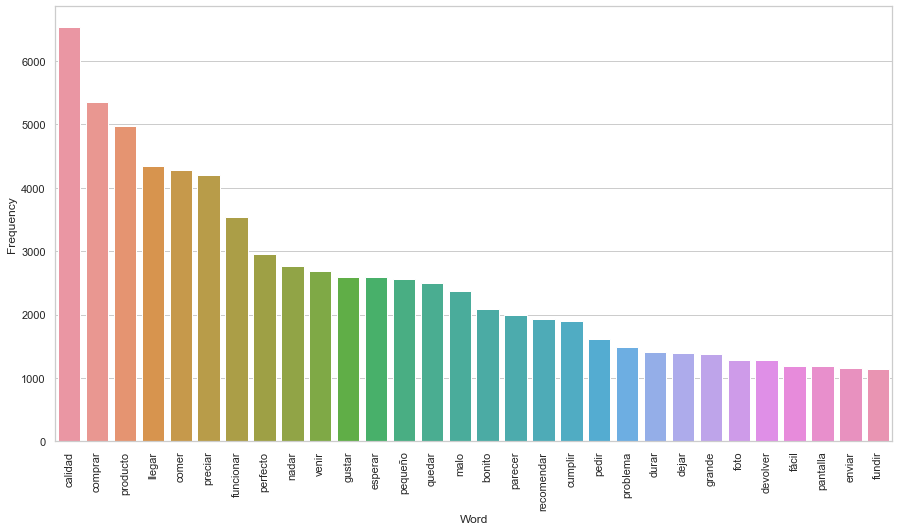

In [246]:
plt.figure(figsize = (15,8))
plot = sns.barplot(x  = df_freq.iloc[:30].Word, y = df_freq.iloc[:30].Frequency)
for item in plot.get_xticklabels():
    item.set_rotation(90)
plt.show()

### **WordCloud**
Vamos a mirar de manera gráfica el ranking de palabras más utilizadas. Para esto vamos a dividir en palabras "negativas" y "positivas" y aplicamos la nube de palabras.

In [247]:
pos = strat_lemm[strat_lemm.stars >= 4]
neg = strat_lemm[strat_lemm.stars <= 2]
neu = strat_lemm[strat_lemm.stars == 3]

### Palabras positivas

In [248]:
pos_words = []
for i in range(pos.shape[0]):
    titular = pos.iloc[i].full_text_lemm
    titular = nltk.tokenize.RegexpTokenizer("[\w]+").tokenize(titular)
    titular = [word for word in titular if word not in stoplist_combined]
    pos_words.append(titular)

In [249]:
pos_words = list(itertools.chain(*pos_words))
pos_words[0:10]

['calidad',
 'producto',
 'correcto',
 'parecer',
 'resistente',
 'rehabilitación',
 'estiramiento',
 'quejar',
 'completar',
 'fundir']

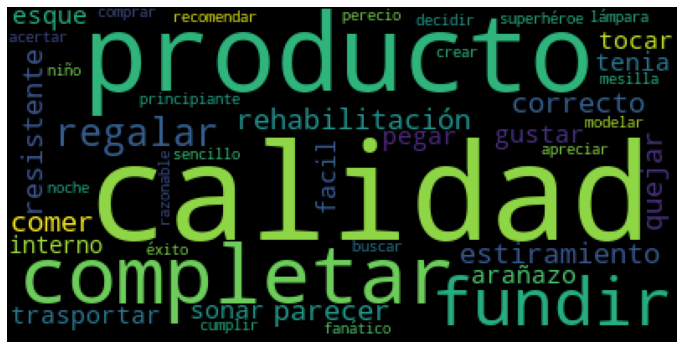

In [250]:
plt.figure(figsize=(12,8))
word_cloud = WordCloud(
                          background_color='black',
                          max_font_size = 80
                         ).generate(" ".join(pos_words[:50]))
plt.imshow(word_cloud)
plt.axis('off')
plt.show()

### Palabras negativas

In [251]:
neg_words = []
for i in range(pos.shape[0]):
    titular = neg.iloc[i].full_text_lemm
    titular = nltk.tokenize.RegexpTokenizer("[\w]+").tokenize(titular)
    titular = [word for word in titular if word not in stoplist_combined]
    neg_words.append(titular)

In [252]:
neg_words = list(itertools.chain(*neg_words))
neg_words[0:10]

['hawaiano',
 'adelantar',
 'recomendar',
 'tallar',
 'habitualmente',
 'comprar',
 'malo',
 'audífono',
 'funcionar',
 'dejar']

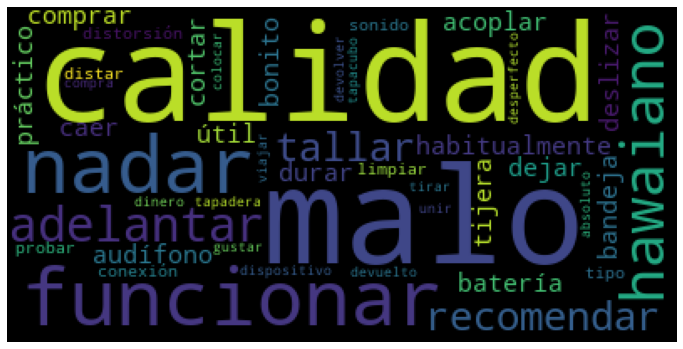

In [253]:
plt.figure(figsize=(12,8))
word_cloud = WordCloud(
                          background_color='black',
                          max_font_size = 80
                         ).generate(" ".join(neg_words[:50]))
plt.imshow(word_cloud)
plt.axis('off')
plt.show()

Interesante: En las palabras negativas aparece "recomendar". Seguramente escribieron "no recomendado" pero con la normalización solo nos quedamos con las palabras clave. Para el próximo trabajo veremos de mantener la verdadera intención del opinador

### **Vectorización con CountVectorizer**
Bag of words. Esta función nos permite representar cada título por un vector con un `1` en las palabras que contiene y un `0` en las que no. Además, vamos a trabajar únicamente con las palabras que aparecen más veces en el texto, ya que las que aparecen una única vez o pocas veces no nos van a brindar información que se pueda generalizar.

### Embeddings

In [289]:
def cv(data):
    count_vectorizer = CountVectorizer()

    emb = count_vectorizer.fit_transform(data)

    return emb, count_vectorizer

In [290]:
X_train, X_test, y_train, y_test = train_test_split(list_strat, stars_strat, test_size = 0.30, random_state = 42)

In [291]:
X_train_counts, count_vectorizer = cv(X_train)
X_test_counts = count_vectorizer.transform(X_test)

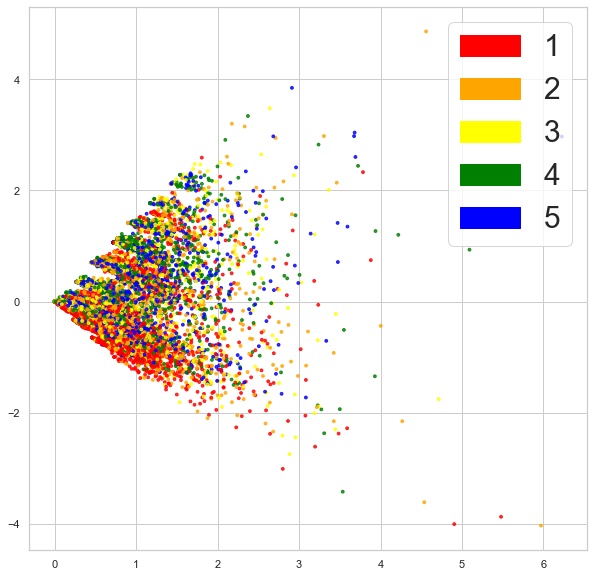

In [292]:
def plot_LSA(test_data, test_labels, savepath = "PCA_demo.csv", plot = True):
        lsa = TruncatedSVD(n_components = 2)
        lsa.fit(test_data)
        lsa_scores = lsa.transform(test_data)
        color_mapper = {label:idx for idx,label in enumerate(set(test_labels))}
        color_column = [color_mapper[label] for label in test_labels]
        colors = ['red','orange','yellow','green','blue']
        if plot:
            plt.scatter(lsa_scores[:,0], lsa_scores[:,1], s=8, alpha=.8, c = test_labels, cmap = matplotlib.colors.ListedColormap(colors))
            red_patch = mpatches.Patch(color='red', label='1')
            orange_patch = mpatches.Patch(color='orange', label='2')
            yellow_patch = mpatches.Patch(color='yellow', label='3')
            green_patch = mpatches.Patch(color='green', label='4')
            blue_patch = mpatches.Patch(color='blue', label='5')
            plt.legend(handles=[red_patch, orange_patch, yellow_patch, green_patch, blue_patch], prop = {'size': 30})

fig = plt.figure(figsize=(10, 10))          
plot_LSA(X_train_counts, y_train)

### Creamos listas para vectorizar

In [293]:
list_strat = list(strat_lemm['full_text_lemm'].values)
stars_strat = strat_lemm['stars']

max_features = 2000

cou_vec = CountVectorizer(max_features = max_features)
matriz_strat = cou_vec.fit_transform(list_strat)
all_words = cou_vec.get_feature_names()

array = matriz_strat.toarray()
header = sorted(cou_vec.vocabulary_.keys())
df_strat_w = pd.DataFrame(array, columns = header)
strat_vec = pd.concat([strat_lemm, df_strat_w], axis=1)

In [294]:
print("50 palabras mas usadas: ", all_words[0:50])

50 palabras mas usadas:  ['abajar', 'abrir', 'abrirlo', 'absoluto', 'acabado', 'acabar', 'accesorio', 'aceitar', 'aceptable', 'acertar', 'aconsejar', 'acoplar', 'acorde', 'acostumbrar', 'actualizar', 'adaptador', 'adaptar', 'adecuado', 'adecuar', 'adelantar', 'ademar', 'adherir', 'adhesivo', 'adquirir', 'adulto', 'agarrar', 'agradable', 'agradecer', 'aguantar', 'aguar', 'agujerar', 'agujero', 'ahorrar', 'aire', 'ajustar', 'alcanzar', 'alguien', 'almohada', 'altavoz', 'alto', 'altura', 'alumbrar', 'amarillo', 'amazon', 'amigo', 'amplio', 'ancho', 'andar', 'anillar', 'antena']


### Hacemos lo mismo con el test set y el dev set

In [295]:
list_test = list(test_lemm['full_text_lemm'].values)
stars_test = test_lemm['stars']

cou_vec = CountVectorizer(max_features = max_features)
matriz_test = cou_vec.fit_transform(list_test)

array = matriz_test.toarray()
header = sorted(cou_vec.vocabulary_.keys())
df_test_w = pd.DataFrame(array, columns = header)
test_vec = pd.concat([test_lemm, df_test_w], axis=1)

In [296]:
list_dev = list(dev_lemm['full_text_lemm'].values)
stars_dev = dev_lemm['stars']

cou_vec = CountVectorizer(max_features = max_features)
matriz_dev = cou_vec.fit_transform(list_dev)

array = matriz_dev.toarray()
header = sorted(cou_vec.vocabulary_.keys())
df_dev_w = pd.DataFrame(array, columns = header)
dev_vec = pd.concat([dev_lemm, df_dev_w], axis=1)

### Nos aseguramos de que no haya valores faltantes

In [297]:
strat_vec = strat_vec.dropna(axis = 0)
test_vec = test_vec.dropna(axis = 0)
dev_vec = dev_vec.dropna(axis = 0)

### **Variables a partir de Emojis**
Creamos nuevas variables a partir de los Emojis mediante la vectorización.
### Train set

In [298]:
lista_emojis = list(strat_vec['emojis'].values)

max_features = 100
cou_vec = CountVectorizer(max_features = max_features, analyzer = 'char', binary = True)
matriz_emojis = cou_vec.fit_transform(lista_emojis)

array = matriz_emojis.toarray()
 
header = sorted(cou_vec.vocabulary_.keys())

df_emojis = pd.DataFrame(array, columns = header)
df_emojis.drop(["'", ",", "[", "]", " "], inplace = True, axis = 1)
strat_emoji = pd.concat([strat_vec, df_emojis], axis=1)

### Test set

In [299]:
lista_emojis = list(test_vec['emojis'].values)

max_features = 100
cou_vec = CountVectorizer(max_features = max_features, analyzer = 'char', binary = True)
matriz_emojis = cou_vec.fit_transform(lista_emojis)

array = matriz_emojis.toarray()
header = sorted(cou_vec.vocabulary_.keys())
df_emojis = pd.DataFrame(array, columns = header)
df_emojis.drop(["'", ",", "[", "]", " "], inplace = True, axis = 1)
test_emoji = pd.concat([test_vec, df_emojis], axis=1)

### Dev set

In [300]:
lista_emojis = list(dev_vec['emojis'].values)

max_features = 100
cou_vec = CountVectorizer(max_features = max_features, analyzer = 'char', binary = True)
matriz_emojis = cou_vec.fit_transform(lista_emojis)

array = matriz_emojis.toarray()
header = sorted(cou_vec.vocabulary_.keys())
df_emojis = pd.DataFrame(array, columns = header)
df_emojis.drop(["'", ",", "[", "]", " "], inplace = True, axis = 1)
dev_emoji = pd.concat([dev_vec, df_emojis], axis=1)

In [301]:
pd.set_option('display.max_columns', None)
strat_emoji.head()

,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category,text_length,full_text,stop_word_count,char_count,mean_word_length,exclamation_count,punctuation_count,uppercase_count,emojis,emojis_count,sentiment,full_text_lemm,abajar,abrir,abrirlo,absoluto,acabado,acabar,accesorio,aceitar,aceptable,acertar,aconsejar,acoplar,acorde,acostumbrar,actualizar,adaptador,adaptar,adecuado,adecuar,adelantar,ademar,adherir,adhesivo,adquirir,adulto,agarrar,agradable,agradecer,aguantar,aguar,agujerar,agujero,ahorrar,aire,ajustar,alcanzar,alguien,almohada,altavoz,alto,altura,alumbrar,amarillo,amazon,amigo,amplio,ancho,andar,anillar,antena,anunciar,apagar,aparato,aparecer,aparentar,aparentemente,apariencia,apartar,apañar,apenar,aplicación,aplicar,apoyar,apple,apreciar,aprender,apretar,apurar,armario,aromar,arreglar,arribar,articular,artículo,asar,asentir,asir,aspecto,aspirador,aspirar,atascar,atención,atrás,audio,aumentar,auricular,autor,auténtico,avisar,ayudar,azul,añadir,bajar,barato,barrer,basar,basura,bateria,batería,bañar,beber,bebé,bici,bicicleta,blanco,blando,bloquear,bluetooth,boca,bola,bolsa,bolsillo,bolso,bombilla,bonito,bordar,borde,borrar,botar,botella,botón,brazo,brillante,brillar,burbuja,buscar,básico,caber,cabeza,cabezal,cable,cabo,cadena,caer,café,caja,cajón,calentar,calentito,calidad,calidadprecio,calor,cama,camara,cambiar,caminar,camiseta,canal,cantidad,capacidad,capaz,característica,carcasa,cargador,cargar,caro,cartucho,cartón,casar,cascar,casco,castellano,centrar,centímetro,cepillar,cerrar,chino,chulo,cincar,cintar,cinturón,cliente,cobrar,coche,cocinar,coger,coincidir,colchón,colgar,colocar,color,colorir,comentar,comentario,comenzar,comer,cometer,comoda,comodidad,comodo,compactar,comparar,compatible,completamente,completar,completo,complicar,compra,comprar,comprarla,comprarlo,comprobar,condición,conectar,conector,conexión,confianza,configurar,conjuntar,considerar,constantemente,consumir,contactar,contar,contener,contentar,contento,contestar,control,controlar,convencer,correar,correctamente,correcto,correo,correr,corresponder,corriente,cortar,corto,cosa,coser,costar,costura,crear,creer,crema,cremallera,cristal,cualquiera,cubrir,cuchilla,cuchillo,cuello,cuerdo,cuero,cuerpo,cuidar,culpar,cumplir,cámara,cómodo,dato,dañar,deber,decepcion,decepcionado,decepcionante,decepcionar,decepción,decidir,dedo,defecto,defectuoso,deficiente,definitivo,deformar,defraudar,dejar,delantero,delgado,delicado,demas,demasiar,demiasiado,depender,deportar,derecho,desaparecer,desastre,descargar,desconectar,descontentar,descoser,describir,descripcion,descripción,desear,desgastar,desmontar,despegar,detallar,detalle,detectar,deteriorar,devolucion,devolución,devolver,devolverla,devolverlo,diario,dibujar,dibujo,diferenciar,dificil,dificultar,difícil,dinero,directamente,disco,diseñar,disfraz,disfrutar,disponer,dispositivo,distanciar,distinto,divertir,doblado,doblar,dolor,dormir,duchar,duda,dudar,durabilidad,duración,duradero,durar,duro,débil,echar,económico,edición,efectivo,efecto,eficaz,elegante,elegir,elevar,embalaje,embalar,embargar,empaquetar,empezar,empresa,encajar,encantado,encantar,encender,enchufar,encimar,encontrar,endeble,enganchar,engañar,engañoso,enorme,ensuciar,entender,enterar,entrar,entregar,entretener,envasar,enviar,envio,envoltorio,equipar,equivocar,error,escaso,escribir,escuchar,espaciar,espalda,español,especial,especificar,espectacular,espectativas,espejar,esperar,espumar,esquina,esquinar,estable,estafar,estilar,estrechar,estrecho,estrella,estrellar,estropear,estuchar,estupendo,estéticamente,estético,etcétera,euro,evitar,exactamente,exacto,excelente,excesivamente,excesivo,expectativa,experiencia,explicación,explicar,exterior,externo,fabricante,fabricar,facil,facilidad,facturar,fallar,fallir,fallo,falso,faltar,falto,fantástico,fatal,favor,fecho,fenomenal,fiable,figurar,fijar,filtrar,finalmente,finar,fino,flexible,flojo,fondo,formar,formato,forzar,foto,fotografiar,fresco,freír,frontal,frágil,fuerte,funcion,funcio

In [302]:
strat_emoji.columns

Index(['review_id', 'product_id', 'reviewer_id', 'stars', 'review_body',
       'review_title', 'language', 'product_category', 'text_length',
       'full_text',
       ...
       '😬', '😭', '😱', '🙃', '🙄', '🙈', '🤗', '🤙', '🤦', '🤷'],
      dtype='object', length=1075)

In [303]:
strat_emoji.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29995 entries, 0 to 29994
Columns: 1075 entries, review_id to 🤷
dtypes: float64(1065), object(10)
memory usage: 246.2+ MB


### Nos aseguramos de que no haya valores faltantes

In [304]:
strat_emoji = strat_emoji.dropna(axis = 0)
test_emoji = test_emoji.dropna(axis = 0)
dev_emoji = dev_emoji.dropna(axis = 0)

### Guardamos los datos

In [270]:
strat_emoji.to_csv('train_vec.csv',index=False)
test_emoji.to_csv('test_vec.csv',index=False)
dev_emoji.to_csv('dev_vec.csv',index=False)

### **Checkpoint 3 - Vectorizado**

In [271]:
train_vec = pd.read_csv('train_vec.csv')
test_vec = pd.read_csv('test_vec.csv')
dev_vec = pd.read_csv('dev_vec.csv')

### Test set

### **Vectorización con Tf - idf**
Agradecimiento a Vitalii Mokin (https://www.kaggle.com/vbmokin) 

*Tf-idf* (del inglés Term frequency – Inverse document frequency), frecuencia de término – frecuencia inversa de documento (o sea, la frecuencia de ocurrencia del término en la colección de documentos), es una medida numérica que expresa cuán relevante es una palabra para un documento en una colección. El valor *tf-idf* aumenta proporcionalmente al número de veces que una palabra aparece en el documento, pero es compensada por la frecuencia de la palabra en la colección de documentos, lo que permite manejar el hecho de que algunas palabras son generalmente más comunes que otras. 

*Tf-idf* es el producto de dos medidas, frecuencia de término y frecuencia inversa de documento. Existen varias maneras de determinar el valor de ambas. En el caso de la frecuencia de término *tf(t, d)*, la opción más sencilla es usar la frecuencia bruta del término *t* en el documento *d*, o sea, el número de veces que el término *t* ocurre en el documento *d*. Si denotamos la frecuencia bruta de *t* por *f(t,d)*, entonces el esquema *tf* simple es *tf(t, d) = f(t,d)*.

**Ejemplo:**
Consideren un documento que contenga 100 palabras donde la palabra 'gato' aparezca 3 veces. 

La frecuencia de término *Tf* para 'gato es (3/100)= 0.03. Ahora, asumamos que tenemos 10 millones de documentos y la palabra 'gato' aparece en 1000 de estos. Entonces, la frecuencia inversa del documento *idf* es calculada como log(10,000,000 / 1,000) = 4. Así, el peso Tf-idf es el  producto de estas cantidades: 0.03 * 4 = 0.12.

### Embeddings

In [365]:
X_train, X_test, y_train, y_test = train_test_split(list_strat, stars_strat, test_size = 0.30, random_state = 42)

In [366]:
def tfidf(data):
    tfidf_vectorizer = TfidfVectorizer(max_features = max_features)

    train = tfidf_vectorizer.fit_transform(data)

    return train, tfidf_vectorizer

X_train_tfidf, tfidf_vectorizer = tfidf(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

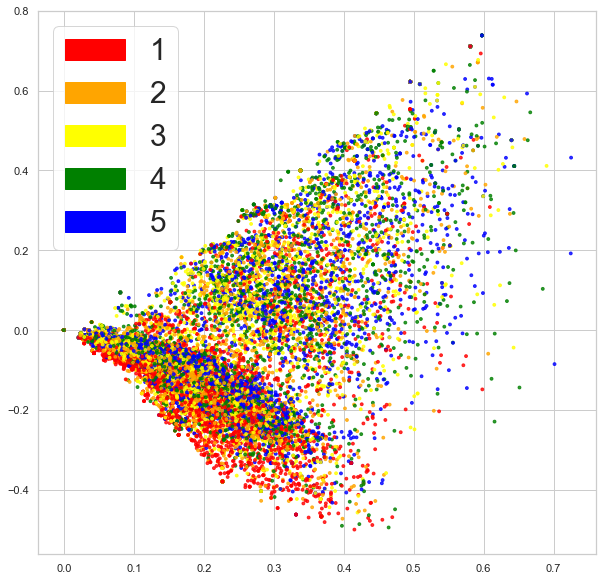

In [367]:
fig = plt.figure(figsize=(10, 10))          
plot_LSA(X_train_tfidf, y_train)

In [368]:
tfidf_vectorizer = TfidfVectorizer(max_features = max_features)
tfidf = tfidf_vectorizer.fit_transform(list_strat)

array = tfidf.toarray()
header = sorted(tfidf_vectorizer.vocabulary_.keys())
df_strat_tf = pd.DataFrame(array, columns = header)
tf_train = pd.concat([strat_lemm, df_strat_tf, df_emojis], axis=1)

### Nos aseguramos de que no haya valores faltantes

In [369]:
tf_train = tf_train.dropna(axis = 0)

Vemos que el Tf-idf está generando mejor los embedings, aunque no se ve una clara separación entre las clases. Es un problema complejo porque hay clases muy parecidas entre sí. Usaremos los resultados de esté modelo de vectorizado para la siguiente etapa.

## **5. Modelos de predicción**

Unificamos los datos relevantes para el modelo en un solo dataframe "X". Vamos a usar solo el train set debido a su cantidad de datos y porque necesitamos conservar la misma cantidad de variables tanto para el train set como el test set.

### Train-Test split

In [370]:
X = tf_train.drop(['review_id', 'product_id', 'reviewer_id', 'stars', 'review_body',
                        'review_title', 'language', 'product_category', 
                        'full_text', 'full_text_lemm', 'char_count', 'emojis'], axis=1)
y = tf_train['stars']

In [371]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42)

### Definimos una función para la matriz de confusión

In [372]:
def confusion(ytest,y_pred):
    names = ["1","2","3","4","5"]
    cm = confusion_matrix(ytest,y_pred)
    f,ax = plt.subplots(figsize = (5,5))
    sns.heatmap(cm, annot = True,linewidth = .5, linecolor = "r", fmt = ".0f", ax = ax)
    plt.xlabel("y_pred")
    plt.ylabel("y_true")
    ax.set_xticklabels(names)
    ax.set_yticklabels(names)
    plt.show()

    return

### **NaiveBayes - Baseline**
Usamos este modelo como baseline para comparar con modelos avanzados.

In [373]:
nb = GaussianNB()
nb.fit(X_train, y_train)
print("acc : ", nb.score(X_test, y_test))

acc :  0.36733333333333335


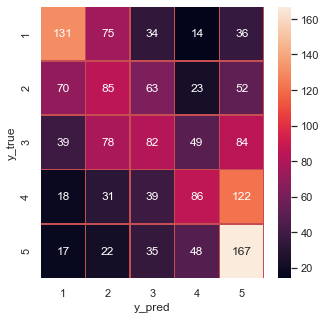

In [374]:
y_pred = nb.predict(X_test)
confusion(y_test,y_pred)

In [375]:
target_names = ["1","2","3","4","5"]
nb_report = classification_report(y_test, y_pred, output_dict=True, target_names= target_names)
nb_df = pd.DataFrame(nb_report)
nb_df

,1,2,3,4,5,accuracy,macro avg,weighted avg
precision,0.476364,0.292096,0.324111,0.390909,0.362256,0.367333,0.369147,0.367824
recall,0.451724,0.290102,0.246988,0.290541,0.577855,0.367333,0.371442,0.367333
f1-score,0.463717,0.291096,0.280342,0.333333,0.445333,0.367333,0.362764,0.360140
support,290.000000,293.000000,332.000000,296.000000,289.000000,0.367333,1500.000000,1500.000000


### SVM

In [376]:
svc = LinearSVC(C = 1)
svc.fit(X_train,y_train)
svc.score(X_test,y_test)

0.336

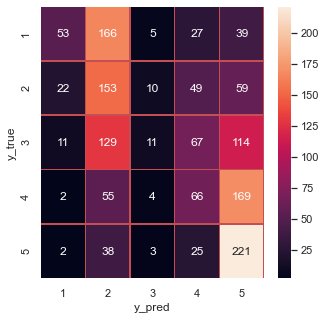

In [377]:
y_pred = svc.predict(X_test)
confusion(y_test,y_pred)

In [378]:
svc_report = classification_report(y_test, y_pred, output_dict=True, target_names= target_names)
svc_df = pd.DataFrame(svc_report)
svc_df

,1,2,3,4,5,accuracy,macro avg,weighted avg
precision,0.588889,0.282810,0.333333,0.282051,0.367110,0.336,0.370839,0.369260
recall,0.182759,0.522184,0.033133,0.222973,0.764706,0.336,0.345151,0.336000
f1-score,0.278947,0.366906,0.060274,0.249057,0.496072,0.336,0.290251,0.283663
support,290.000000,293.000000,332.000000,296.000000,289.000000,0.336,1500.000000,1500.000000


### **Random Forest**

In [379]:
rf = RandomForestClassifier(random_state = 42)

### Optimización de hiperparámetros

In [406]:
random_grid = {'n_estimators': [int(x) for x in np.linspace(start = 200, stop = 1200, num = 12)],
               'max_features': ['auto', 'sqrt'],
               'max_depth': [int(x) for x in np.linspace(5, 30, num = 6)],
               'min_samples_split': [2, 5, 10, 15, 100],
               'min_samples_leaf': [1, 2, 5,10],
               'bootstrap': [True, False]}


In [407]:
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, n_jobs = -1, cv = 2, verbose = 3, random_state = 42)

**ATENCIÓN:** Este proceso demanda muchos recursos y puede tomar varios minutos en completarse

In [408]:
rf_random.fit(X_train, y_train)

Fitting 2 folds for each of 100 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:   11.2s
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:   46.7s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:  1.3min finished


RandomizedSearchCV(cv=2, estimator=RandomForestClassifier(random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [200, 290, 381, 472,
                                                         563, 654, 745, 836,
                                                         927, 1018, 1109,
                                                         1200]},
                   random_state=42, verbose=3)

In [409]:
rf_random.best_params_

{'n_estimators': 654,
 'min_samples_split': 15,
 'min_samples_leaf': 5,
 'max_features': 'sqrt',
 'max_depth': 5,
 'bootstrap': True}

In [410]:
rf_random.best_estimator_

RandomForestClassifier(max_depth=5, max_features='sqrt', min_samples_leaf=5,
                       min_samples_split=15, n_estimators=654, random_state=42)

In [411]:
rf_random.best_score_

0.41714285714285715

### Probamos el modelo optimizado

In [412]:
rfc = RandomForestClassifier(max_depth=30, max_features='sqrt', min_samples_leaf=2,
                             min_samples_split=10, n_estimators=1109,random_state=42)
rfc.fit(X_train, y_train)

RandomForestClassifier(max_depth=30, max_features='sqrt', min_samples_leaf=2,
                       min_samples_split=10, n_estimators=1109,
                       random_state=42)

In [413]:
print("acc: ", rfc.score(X_test,y_test))

acc:  0.4046666666666667


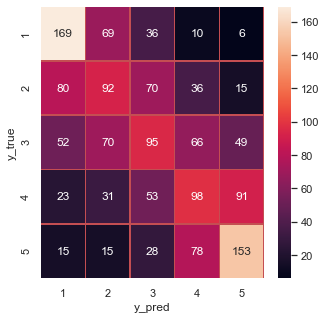

In [414]:
y_pred = rfc.predict(X_test)
confusion(y_test,y_pred)

In [415]:
rf_report = classification_report(y_test, y_pred, output_dict = True, target_names = target_names)
rf_df = pd.DataFrame(rf_report)
rf_df

,1,2,3,4,5,accuracy,macro avg,weighted avg
precision,0.498525,0.332130,0.336879,0.340278,0.487261,0.404667,0.399015,0.396847
recall,0.582759,0.313993,0.286145,0.331081,0.529412,0.404667,0.408678,0.404667
f1-score,0.537361,0.322807,0.309446,0.335616,0.507463,0.404667,0.402539,0.399435
support,290.000000,293.000000,332.000000,296.000000,289.000000,0.404667,1500.000000,1500.000000


<AxesSubplot:>

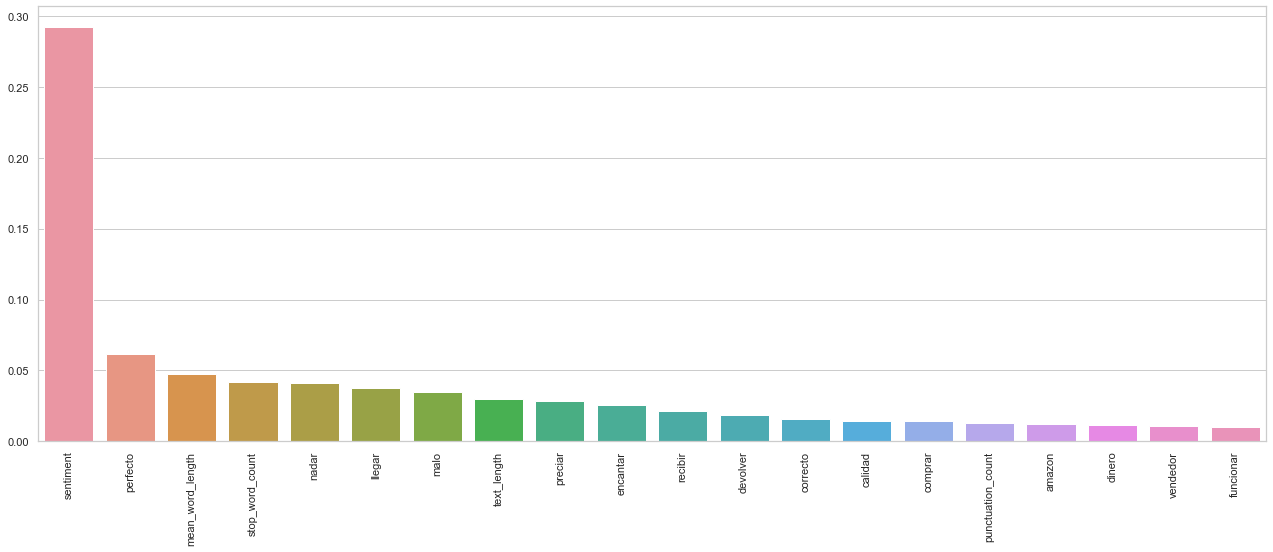

In [399]:
importances = rfc.feature_importances_

columns = X_train.columns

# Ordenamos por importnacia y tomamos las 20 primeras
indices = np.argsort(importances)[::-1]
indices = indices[:20]
selected_columns = [columns[i] for i in indices]
selected_importances = importances[indices]

# Por ultimo graficamos
plt.figure(figsize = (22,8))
plt.xticks(rotation = 90)
sns.barplot(selected_columns, selected_importances)

El análisis de sentimientos nos ha aportado la mayor parte del resultado en el modelo.

## Comparativa de modelos

### Accuracy

<AxesSubplot:xlabel='index', ylabel='f1-score'>

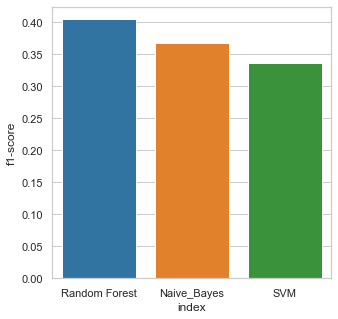

In [442]:
comparison_acc = pd.concat([rf_df['accuracy'], nb_df['accuracy'], svc_df['accuracy']], axis = 1, names = target_names)
comparison_acc.columns = ['Random Forest','Naive_Bayes','SVM']
comparison_acc.transpose
plt.figure(figsize=(5,5))
sns.barplot(data = comparison_acc.transpose().reset_index(), x = 'index', y = 'f1-score', palette = "tab10")

In [428]:
rf_results = rf_df[['1','2','3','4','5']].transpose().reset_index()
svc_results = svc_df[['1','2','3','4','5']].transpose().reset_index()
nb_results = nb_df[['1','2','3','4','5']].transpose().reset_index()

### F1-Score de cada clase predicha

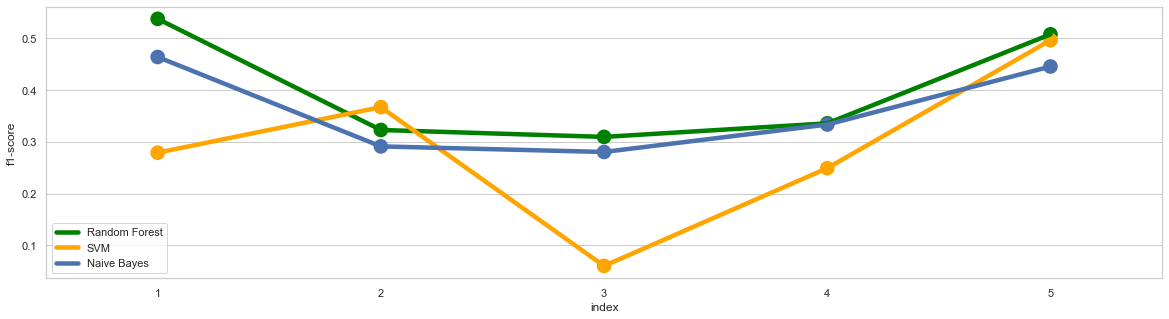

In [436]:
f = plt.figure(figsize=(20,5))
ax = f.add_subplot(111)
sns.pointplot(data = rf_results, y = 'f1-score', x = 'index', label = 'Random Forest', ax = ax, color = 'green')
sns.pointplot(data = svc_results, y = 'f1-score', x = 'index', label = 'SVM', ax = ax, color = 'orange')
sns.pointplot(data = nb_results, y = 'f1-score', x = 'index', label = 'Naive Bayes', ax = ax)

ax.legend(handles = ax.lines[::len(rf_results)+1], labels = ['Random Forest','SVM', 'Naive Bayes'])

### **6. Conclusiones**
Logramos superar los modelos creados en el TP3 con las nuevas variables que incorporamos y Tf-idf en casi un 100% (de 0.2 a 0.4 de accuracy). Para un predictor multiclase es una tarea difícil, a esta altura ya exprimimos los datos al máximo posible extrayendo variables de los textos, por lo que mucho no nos queda por mejorar ahí. Nuestros siguientes pasos luego de esta intensa búsqueda dentro de los datos será incoporar algoritmos más potentes para vectorizar y predecir las clases como BERT y GloVe.

Para ver los avances entre el TP3 y TP4, pueden entrar a este [link](https://github.com/frangarayl/NLP-amazon.git) que los llevara al repositorio de GitHub donde se encuentra.

## ¡Muchas gracias por haber llegado hasta acá! ¡Espero que te haya servido!
Agradecimientos:
* Acámica, por el desafío
* Vitalii Mokin de Kaggle (https://www.kaggle.com/vbmokin), por enseñarme a extraer y visualizar valor de los textos
* Toda la comunidad de Data Science que nos aporta para nuestros trabajos

### *Francisco Garay Linares, DS-33 Acámica*


